In [1]:
#this uses iPython magic to make plots appear inline
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
import sys
import numpy as np
import matplotlib.patches as patches
import glob

def count_lines(f):
    lineCount = 0
    with open(f, 'r') as f:
        for line in f:
            lineCount += 1
        return lineCount
def runCMD(cmd):
    val = subprocess.Popen(cmd, shell=True).wait()
    if val == 0:
        pass
    else:
        print ('command failed')
        print (cmd)
        sys.exit(1)

In [2]:
#Define admixture directory
inDir = '/home/ampend/links/kidd-lab/ampend-projects/Angela/ADMIXTURE/ForManuscript_43Dogs_10Wolves_Only/'


In [3]:
#make sample information file
#sampleFile = open('/home/ampend/links/kidd-lab/ampend-projects/cfERVs/ADMIXTURE/input/sample-names-to-groups.txt', 'r')
sampleFile = open(inDir + 'input/keep_dogs_greywolves_unrelated_MANUSCRIPT_ORDERED.txt','r')
sampleDict = {}
for line in sampleFile:
    line=line.rstrip().split('\t')
    if 'sample' in line[0]: #skips header
        continue
    sampleDict[line[0]] = line

In [4]:
#parse the input .fam file
famFile = open(inDir + 'input/ForManuscript_43Dogs_10Wolves_FilteredSampleSet_XPCLR_FST_Set_pruned.fam','r')
dogData = {}

#outfile is the .ind file that we want to create for plotting admixture results
#Structure is sample ID, sex, population (3 tab delimited columns)
indFile = open(inDir + 'input/ForManuscript_43Dogs_10Wolves_FilteredSampleSet_XPCLR_FST_Set_pruned.ind', 'w')

#Processing the .fam file to write to indFile
index=0
for line in famFile:
    line=line.rstrip().split(' ')
    index += 1
    dogData[index] = ([line[0],line[4],line[2]])
    sampleID = line[0]
    indFile.write('%s\t%s\t%s\n' % (line[0],line[4],line[2]))
indFile.close()

In [12]:
#Determining the order I want to plot the dogs in for the bar plot FOR ddPCR ONLY
plotOrder = []

inFile = open(inDir + 'input/keep_dogs_greywolves_unrelated_MANUSCRIPT_ORDERED.txt')
for line in inFile:
    if 'sample' in line: #skips header
        continue
    line = line.rstrip().split()
    sampleID = line[0]
    plotOrder.append([line[0],line[1],line[2],line[3],line[4]])
inFile.close()
print('%i samples read into Plot Order' % len(plotOrder))

53 samples read into Plot Order


In [29]:
def get_AD_data(dogData,k):
    inFile = open(runDir + 'ForManuscript_43Dogs_10Wolves_FilteredSampleSet_XPCLR_FST_Set_pruned.%i.Q' % k, 'r')
    ADdata, index = {}, 0
    for line in inFile:
        line = line.rstrip().split(' ')
        index += 1
        sampleID = dogData[index][0]
        ADdata[sampleID] = line    
    return ADdata
########################################################################################################
def get_cross_validation_errors(runNum,k):
    inFile = open(runDir + 'ForManuscript_43Dogs_10Wolves_FilteredSampleSet_XPCLR_FST_Set_pruned_Run%i_log%i.out' % (runNum,k), 'r')
    for line in inFile:
        line=line.rstrip()
        if 'CV error' not in line:
            continue
        line=line.split(' ')
        CV = float(line[3])
        return CV
########################################################################################################
def draw_plot(plotFile,plotOrder,k,ADdata):
    labelFont  = {'fontname':'Arial'}
    width = 1.0
    names,ticks,labels = [], [], {}
    plt.figure(figsize=(45,15))

    for i in range(len(plotOrder)):
        sample = plotOrder[i][0]
        prev_height = 0
        for num in range(0,10):
            if num > k - 1:
                height = 0
            else:
                height = float(ADdata[sample][num]) * 100
            _ = plt.bar(i, height, width, bottom = prev_height,edgecolor='black')
            prev_height = prev_height + height
        names.append(plotOrder[i][4] + '_' + plotOrder[i][0])
        ticks.append(i)

    _ = plt.xticks(ticks,names,rotation=90,fontsize=20)
    _ = plt.xlim([-1,ticks[-1]+1])
    _ = plt.yticks([])
    _ = plt.ylim([0,100])
    #_ = plt.vlines(x=25,ymin=0,ymax=100, lw=3,color="white")
    _ = plt.vlines(x=42.5,ymin=0,ymax=100, lw=3,color="white")

    plt.legend(loc=2)
    plt.subplots_adjust(bottom=0.25)
    #plt.text(78, -35, 'Breed Dogs', fontsize=40)
    plt.text(18, -35, 'Village Dogs', fontsize=40)
    plt.text(46, -35, 'Wolves', fontsize=40)
    plt.ylabel('K = %i' % int(k), fontsize=100)
    plt.title('')
    #plt.tight_layout()
    plt.savefig(plotFile, format='pdf', dpi=200)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/sw/lsa/centos7/python-anaconda-arc-connect/created-20170421

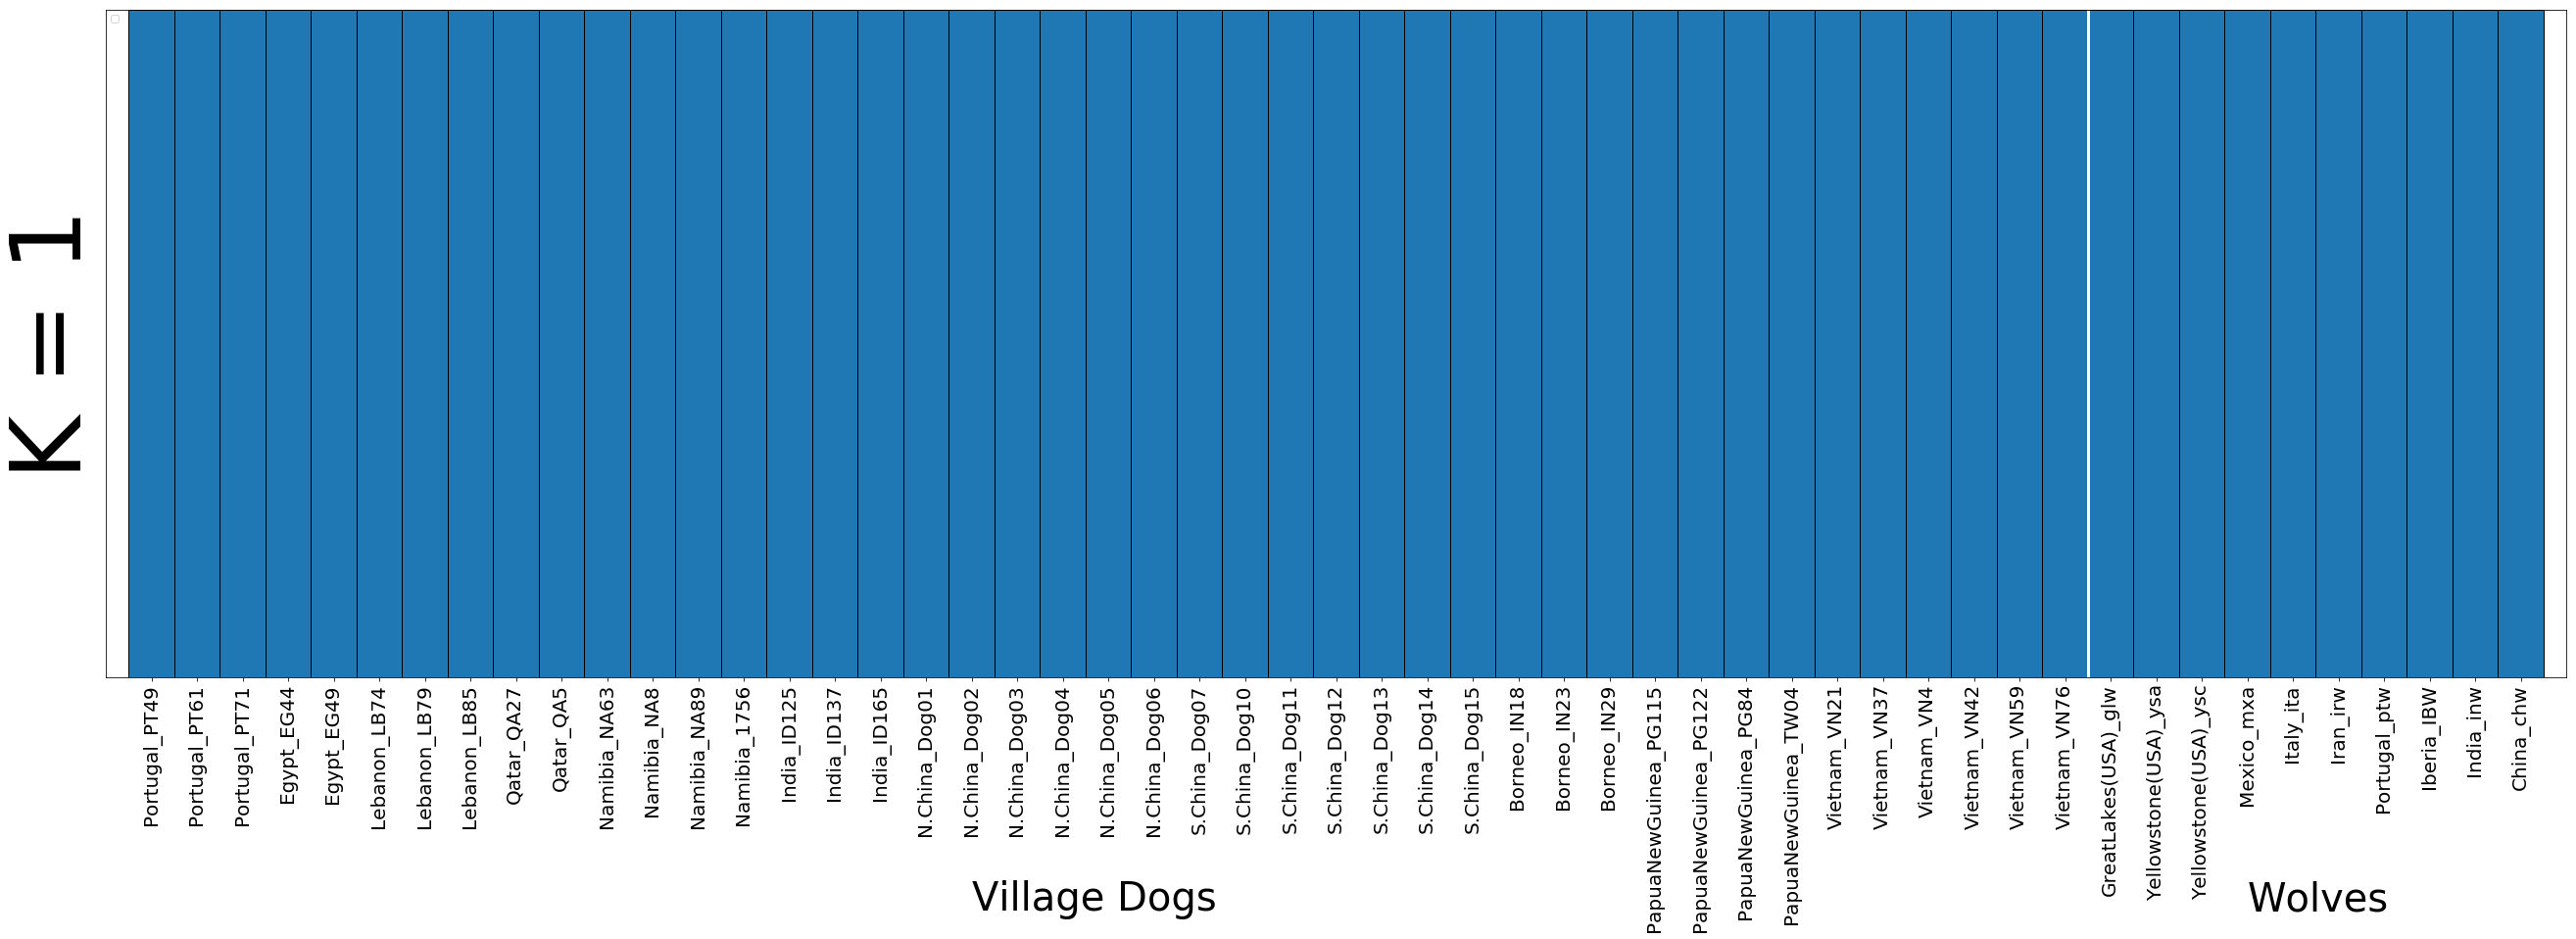

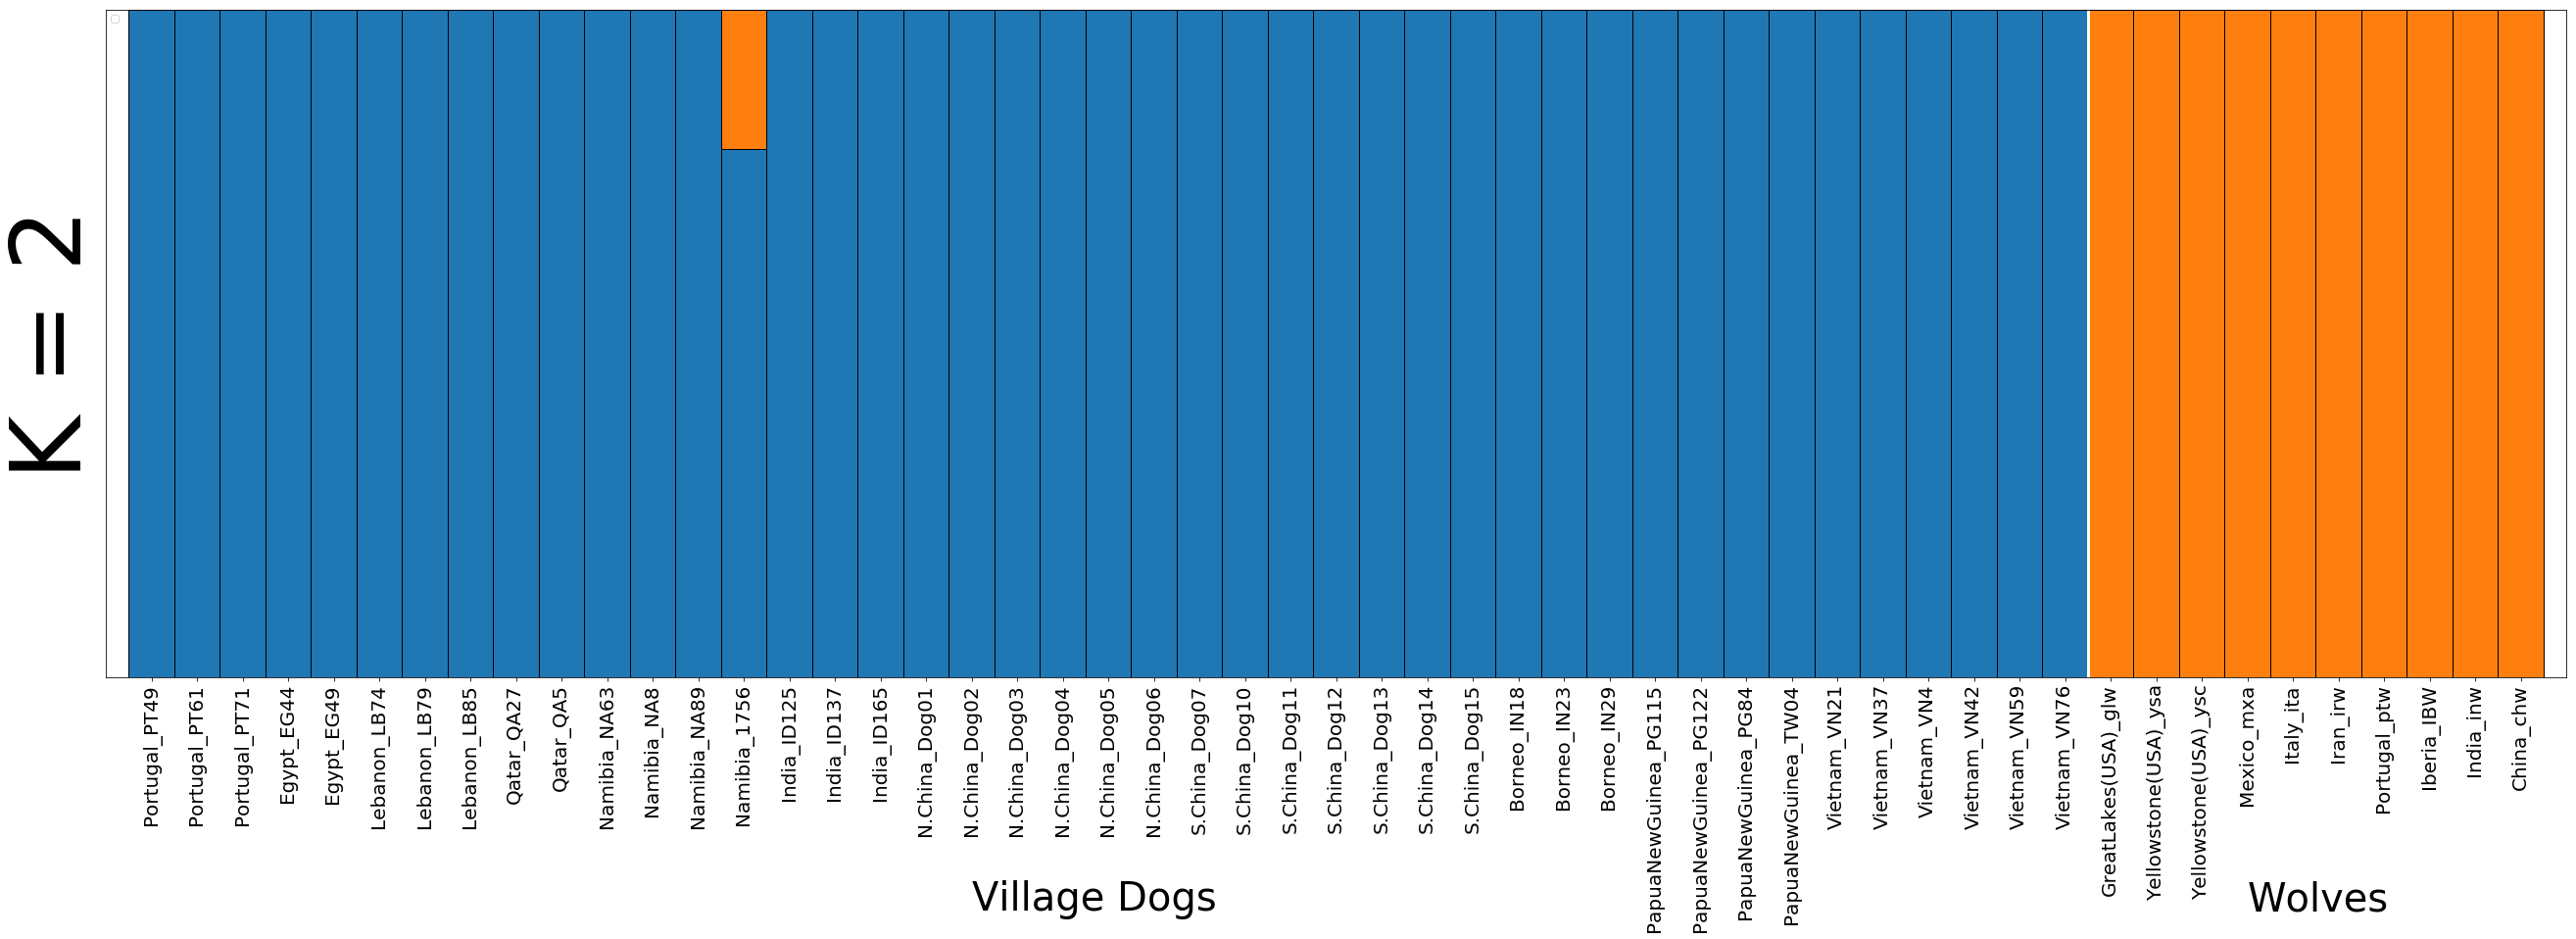

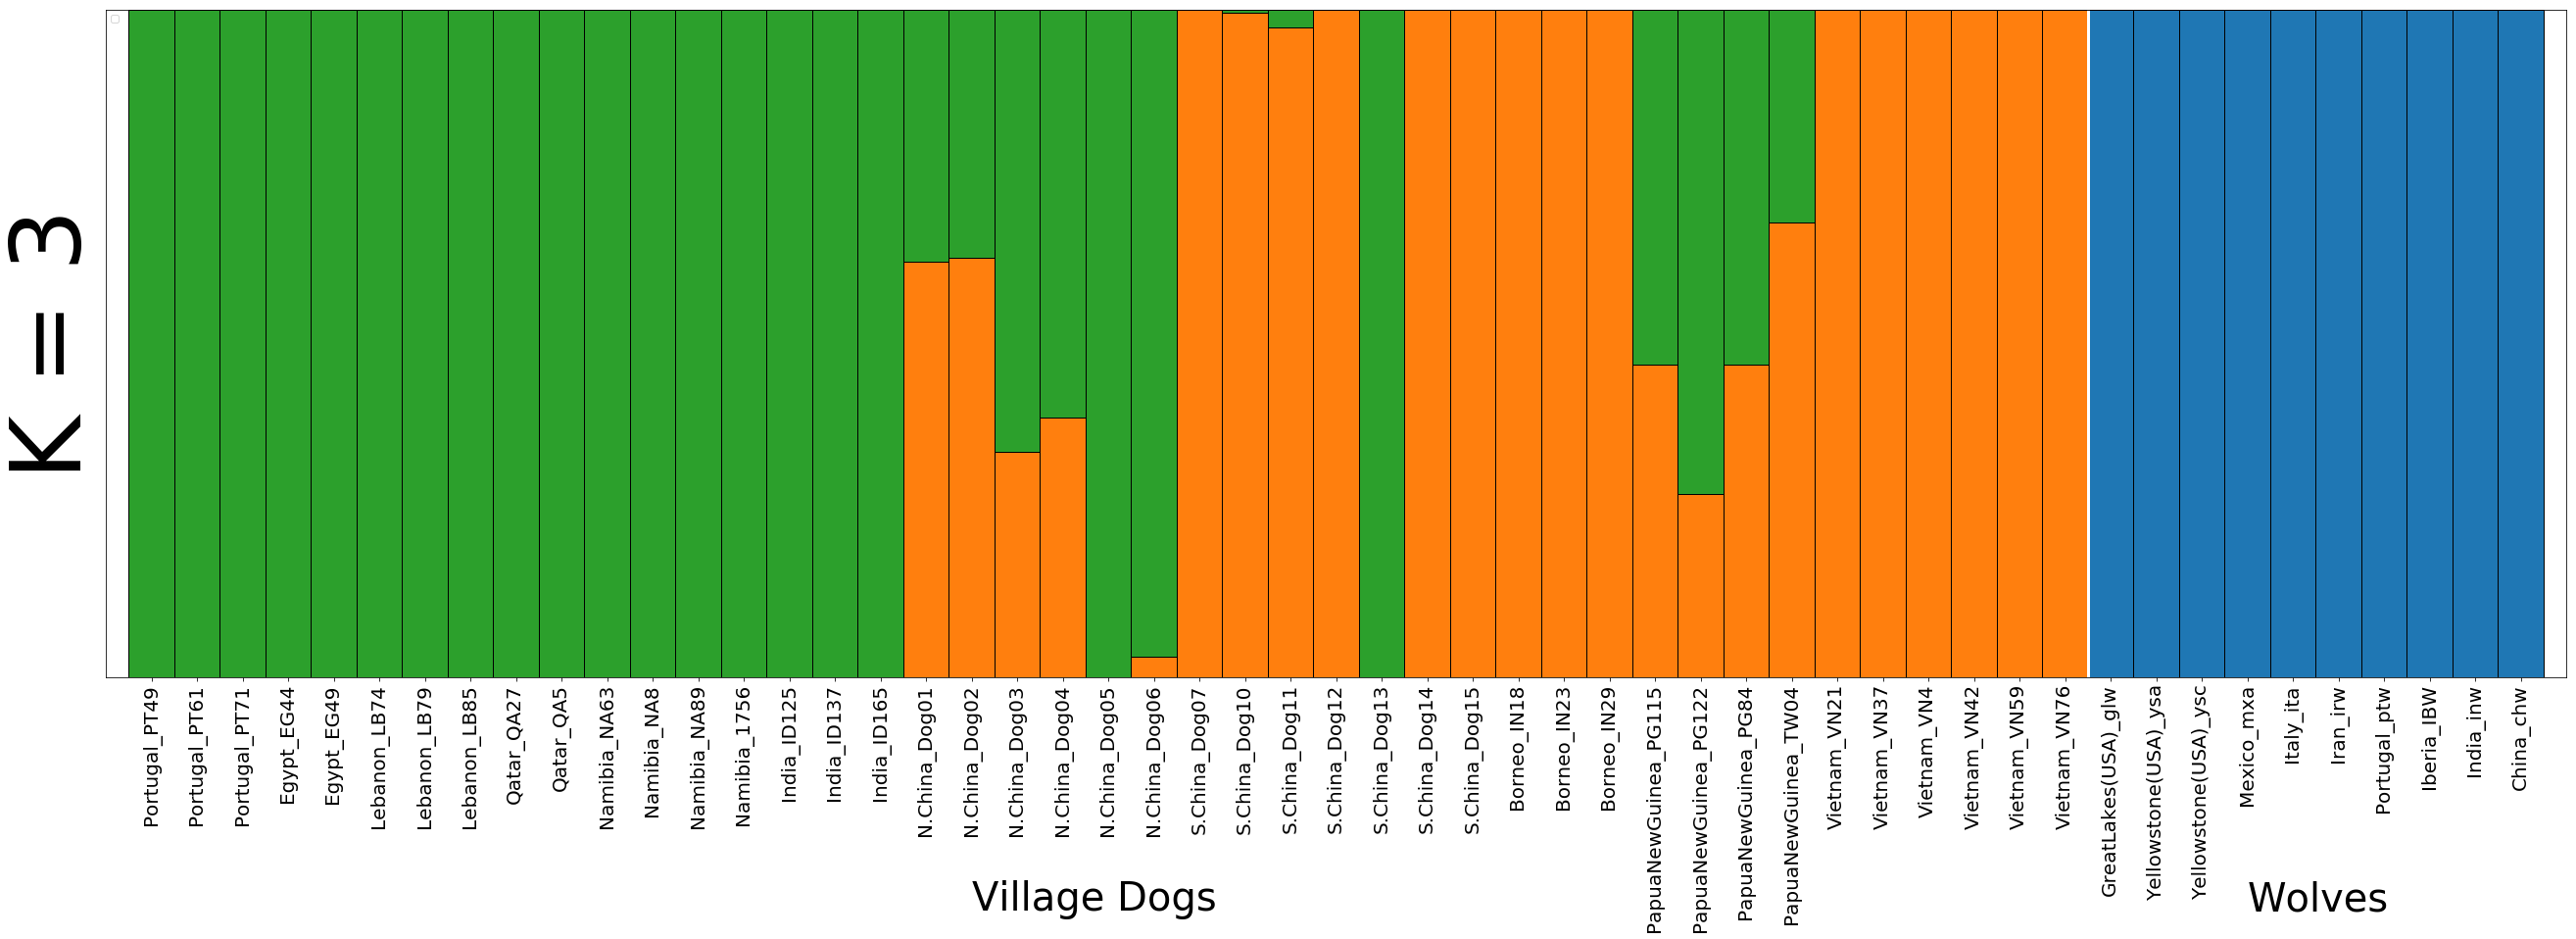

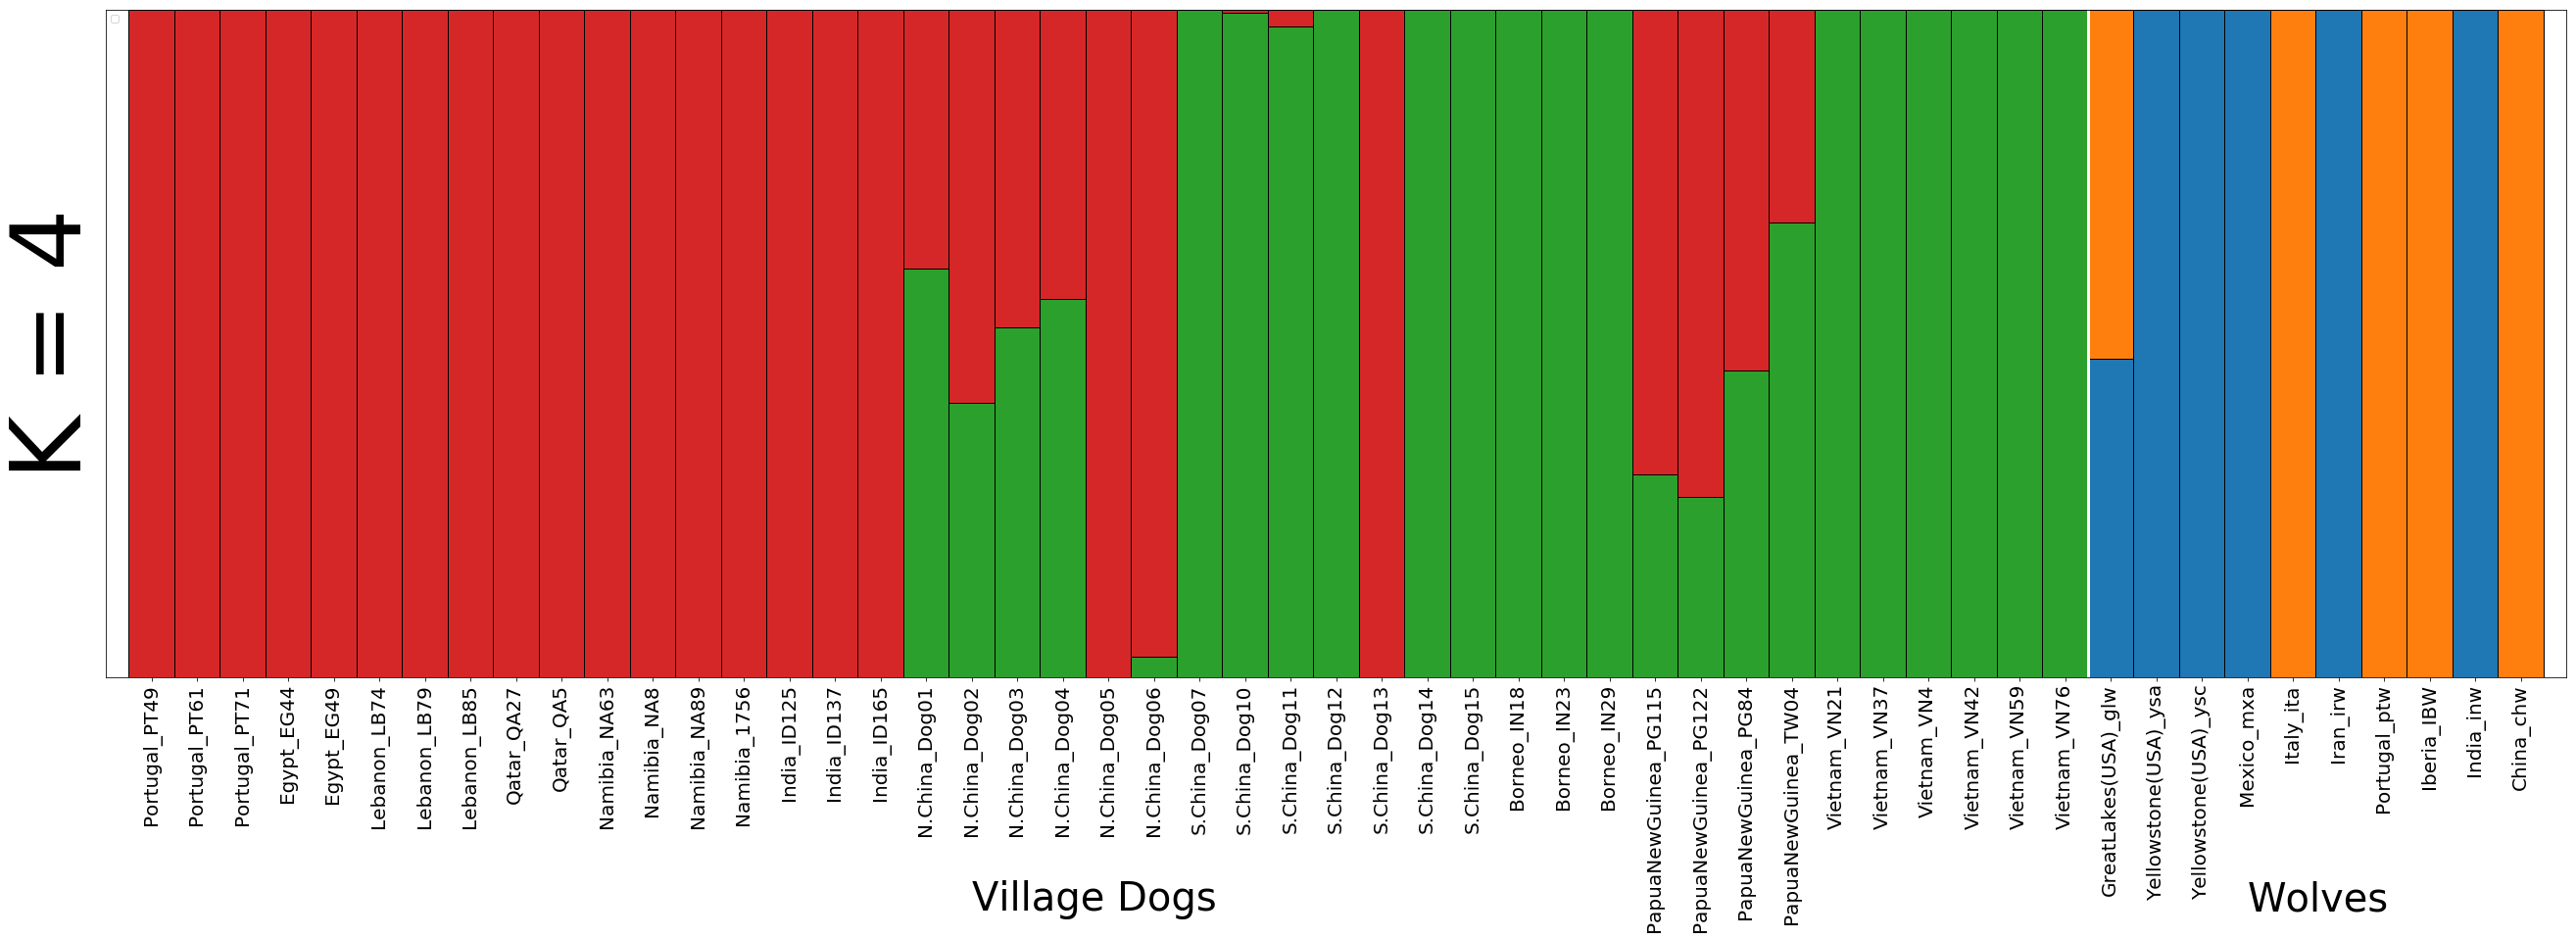

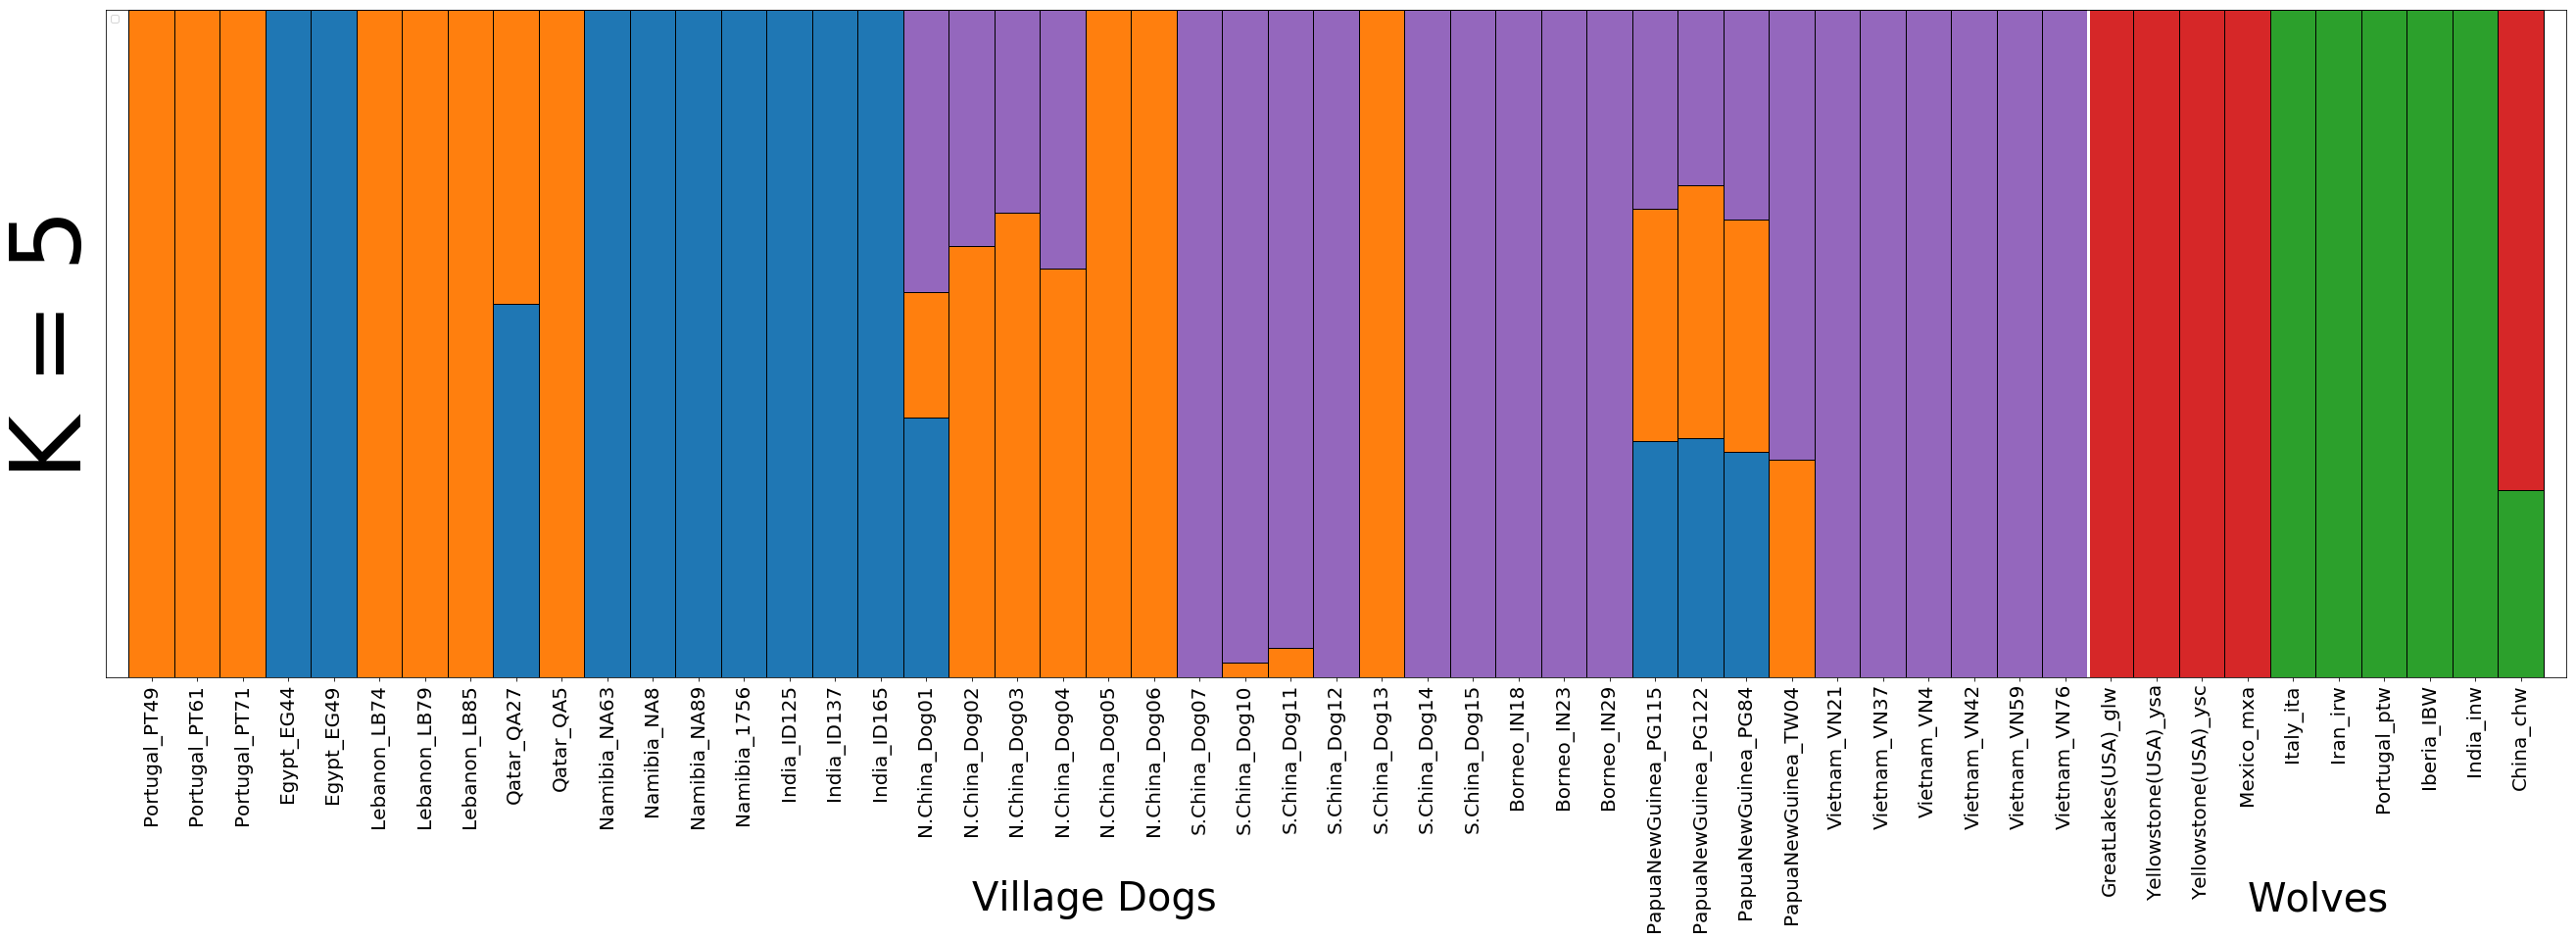

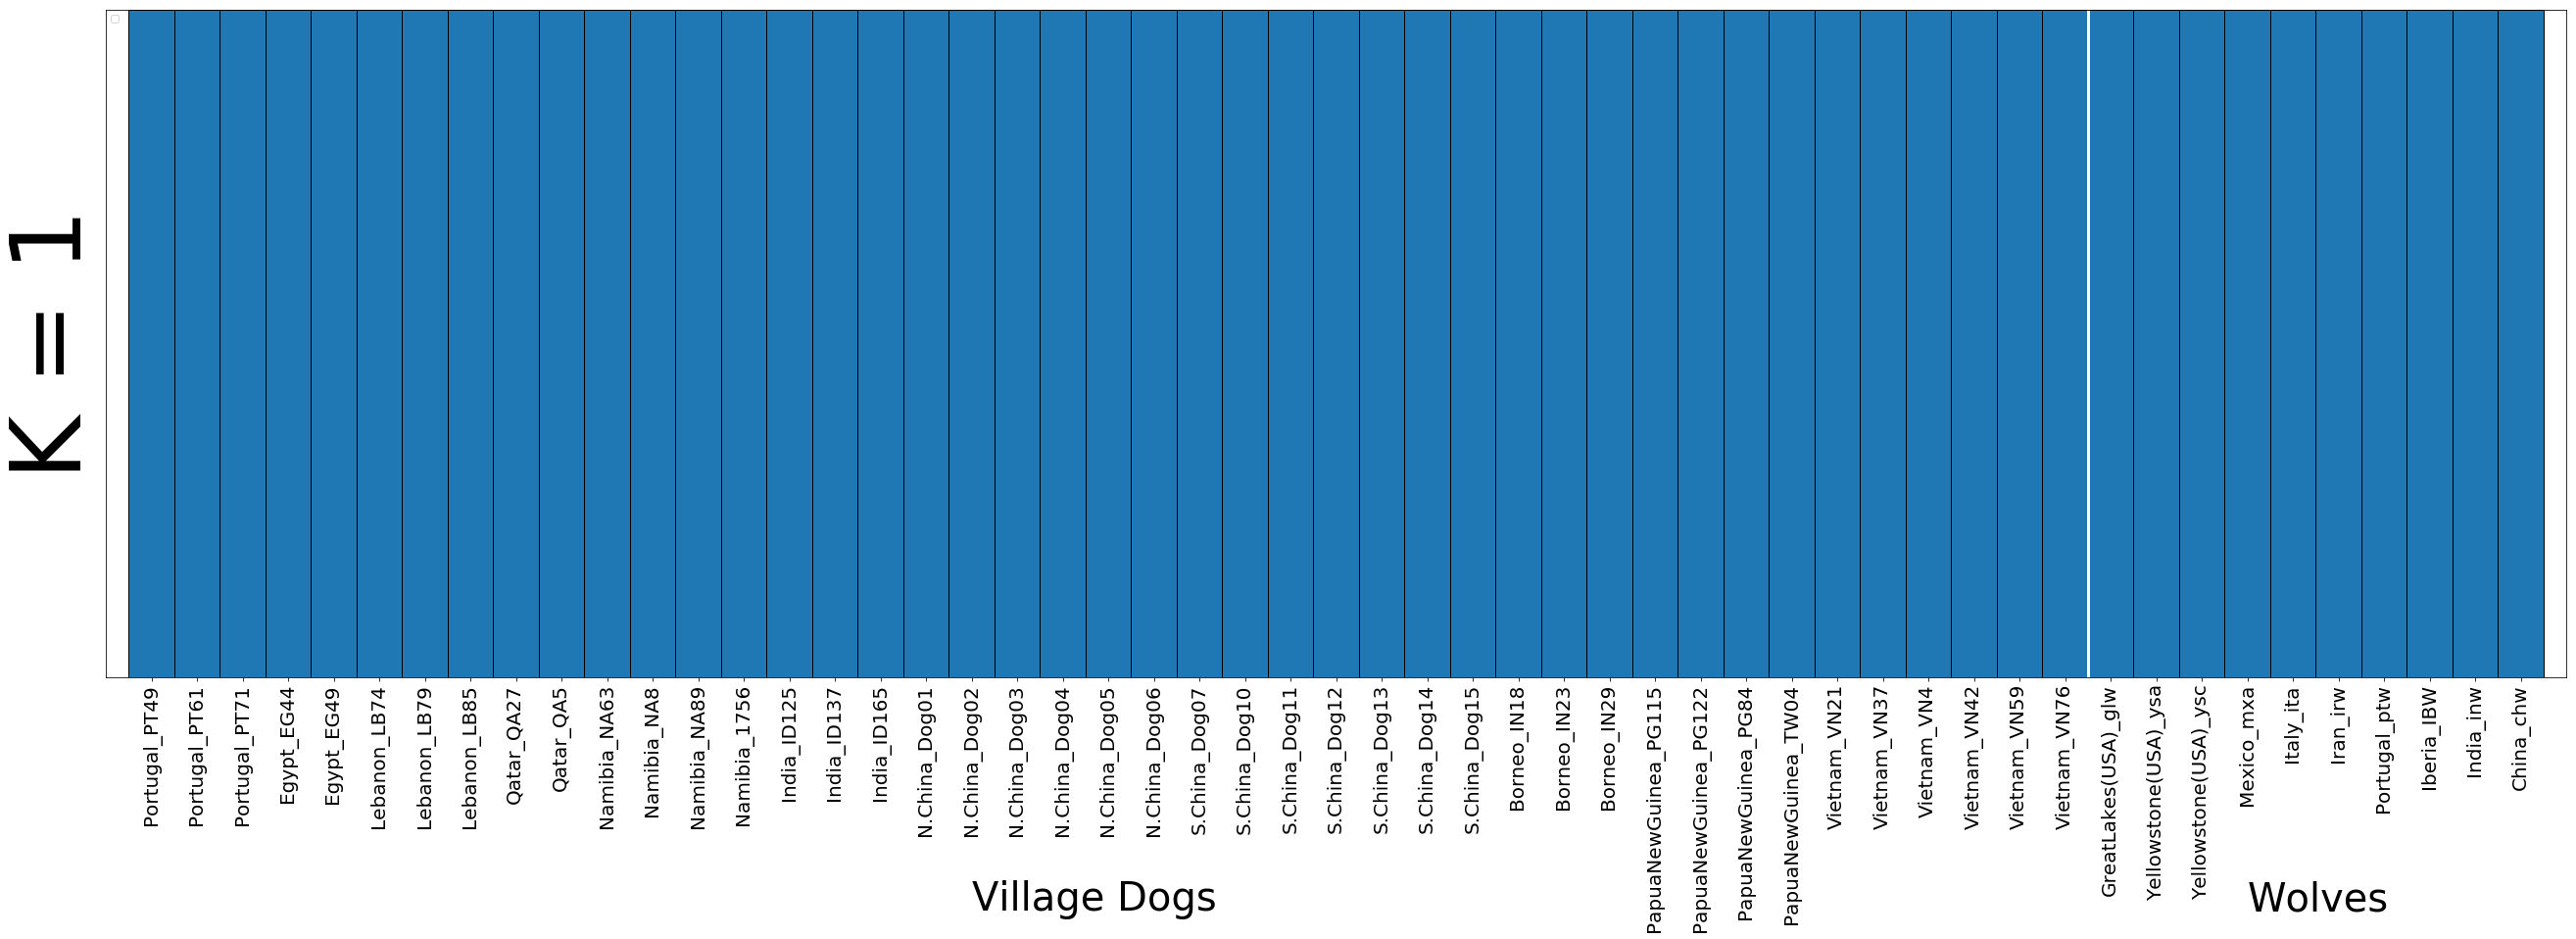

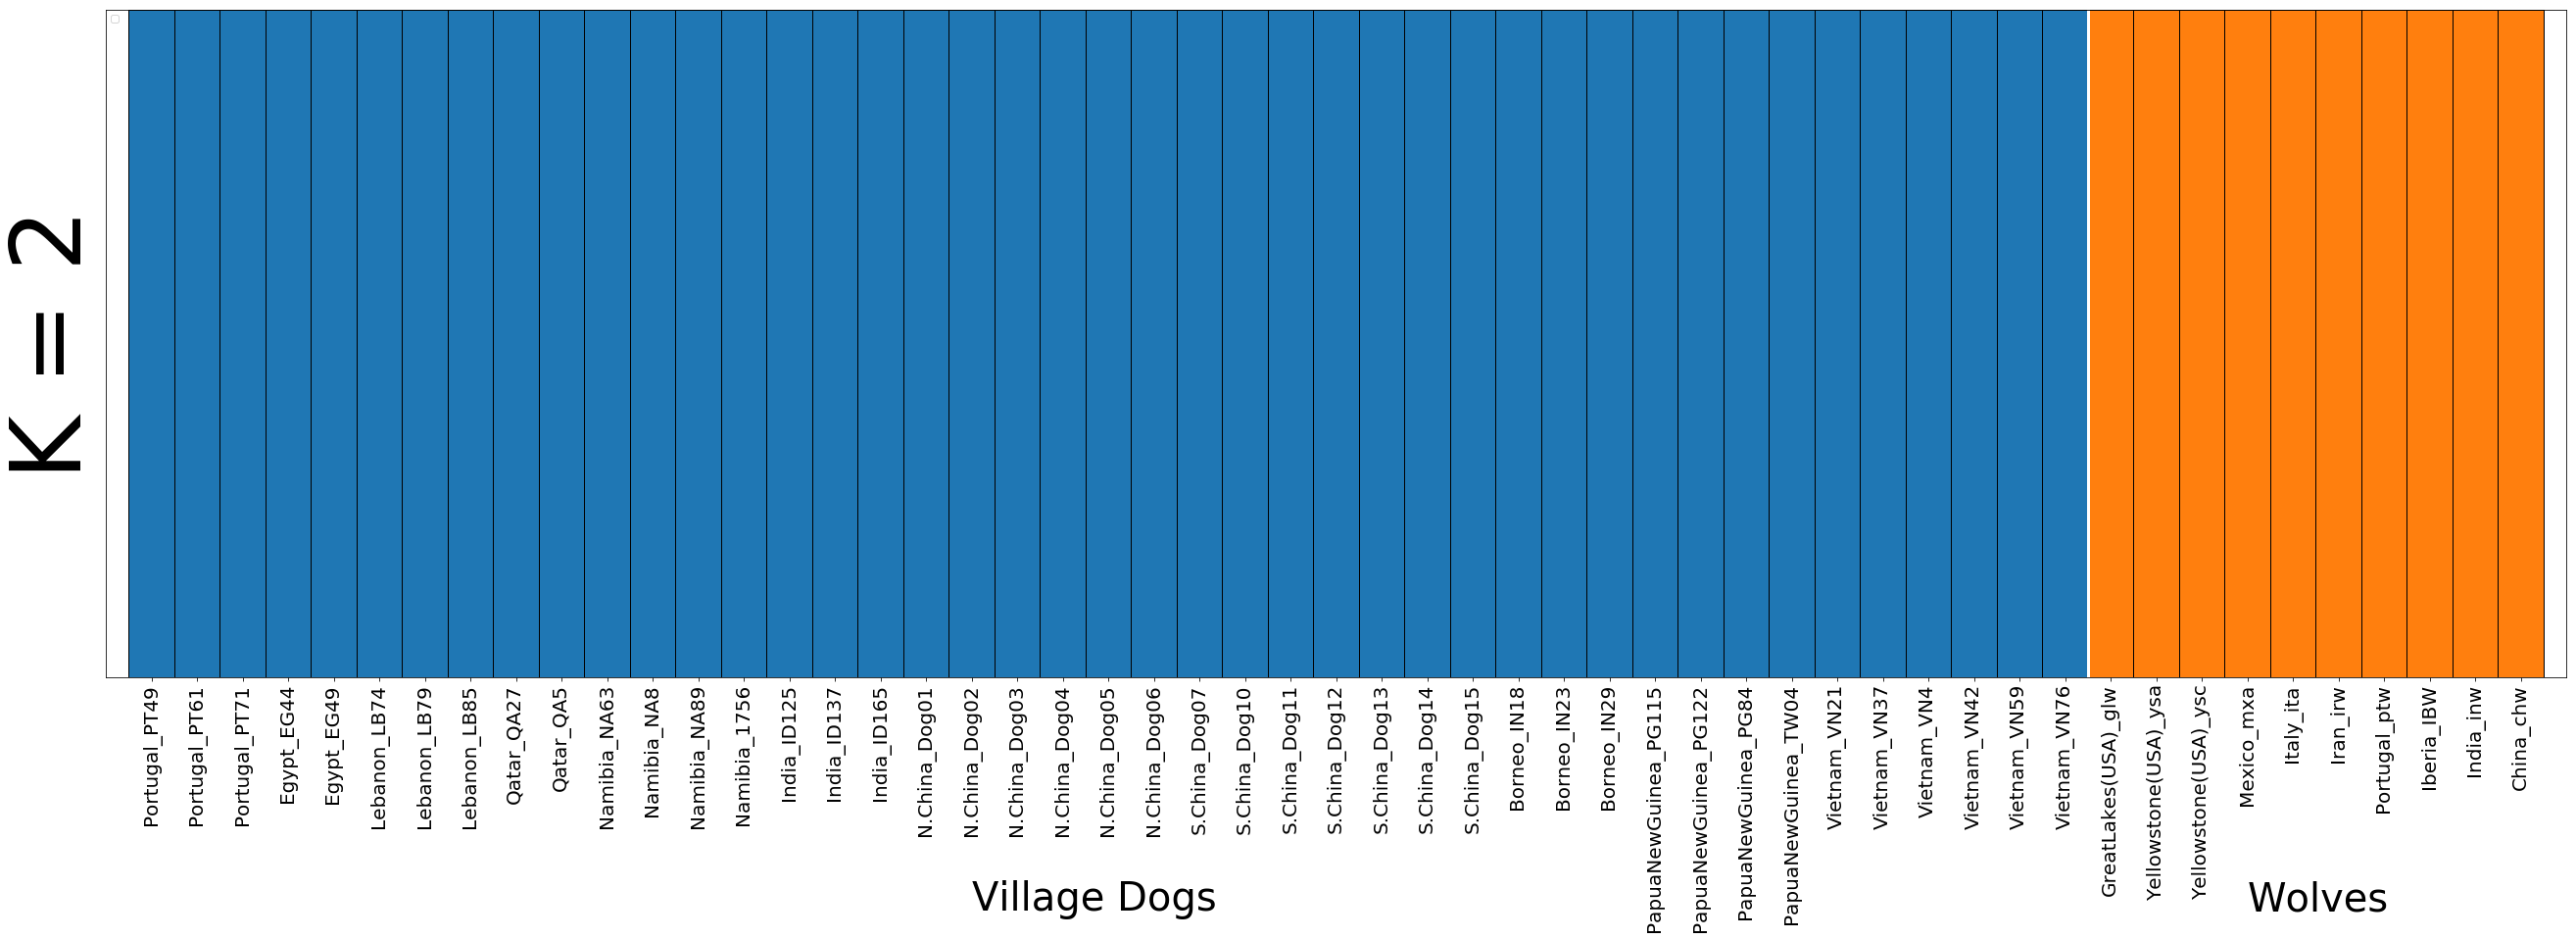

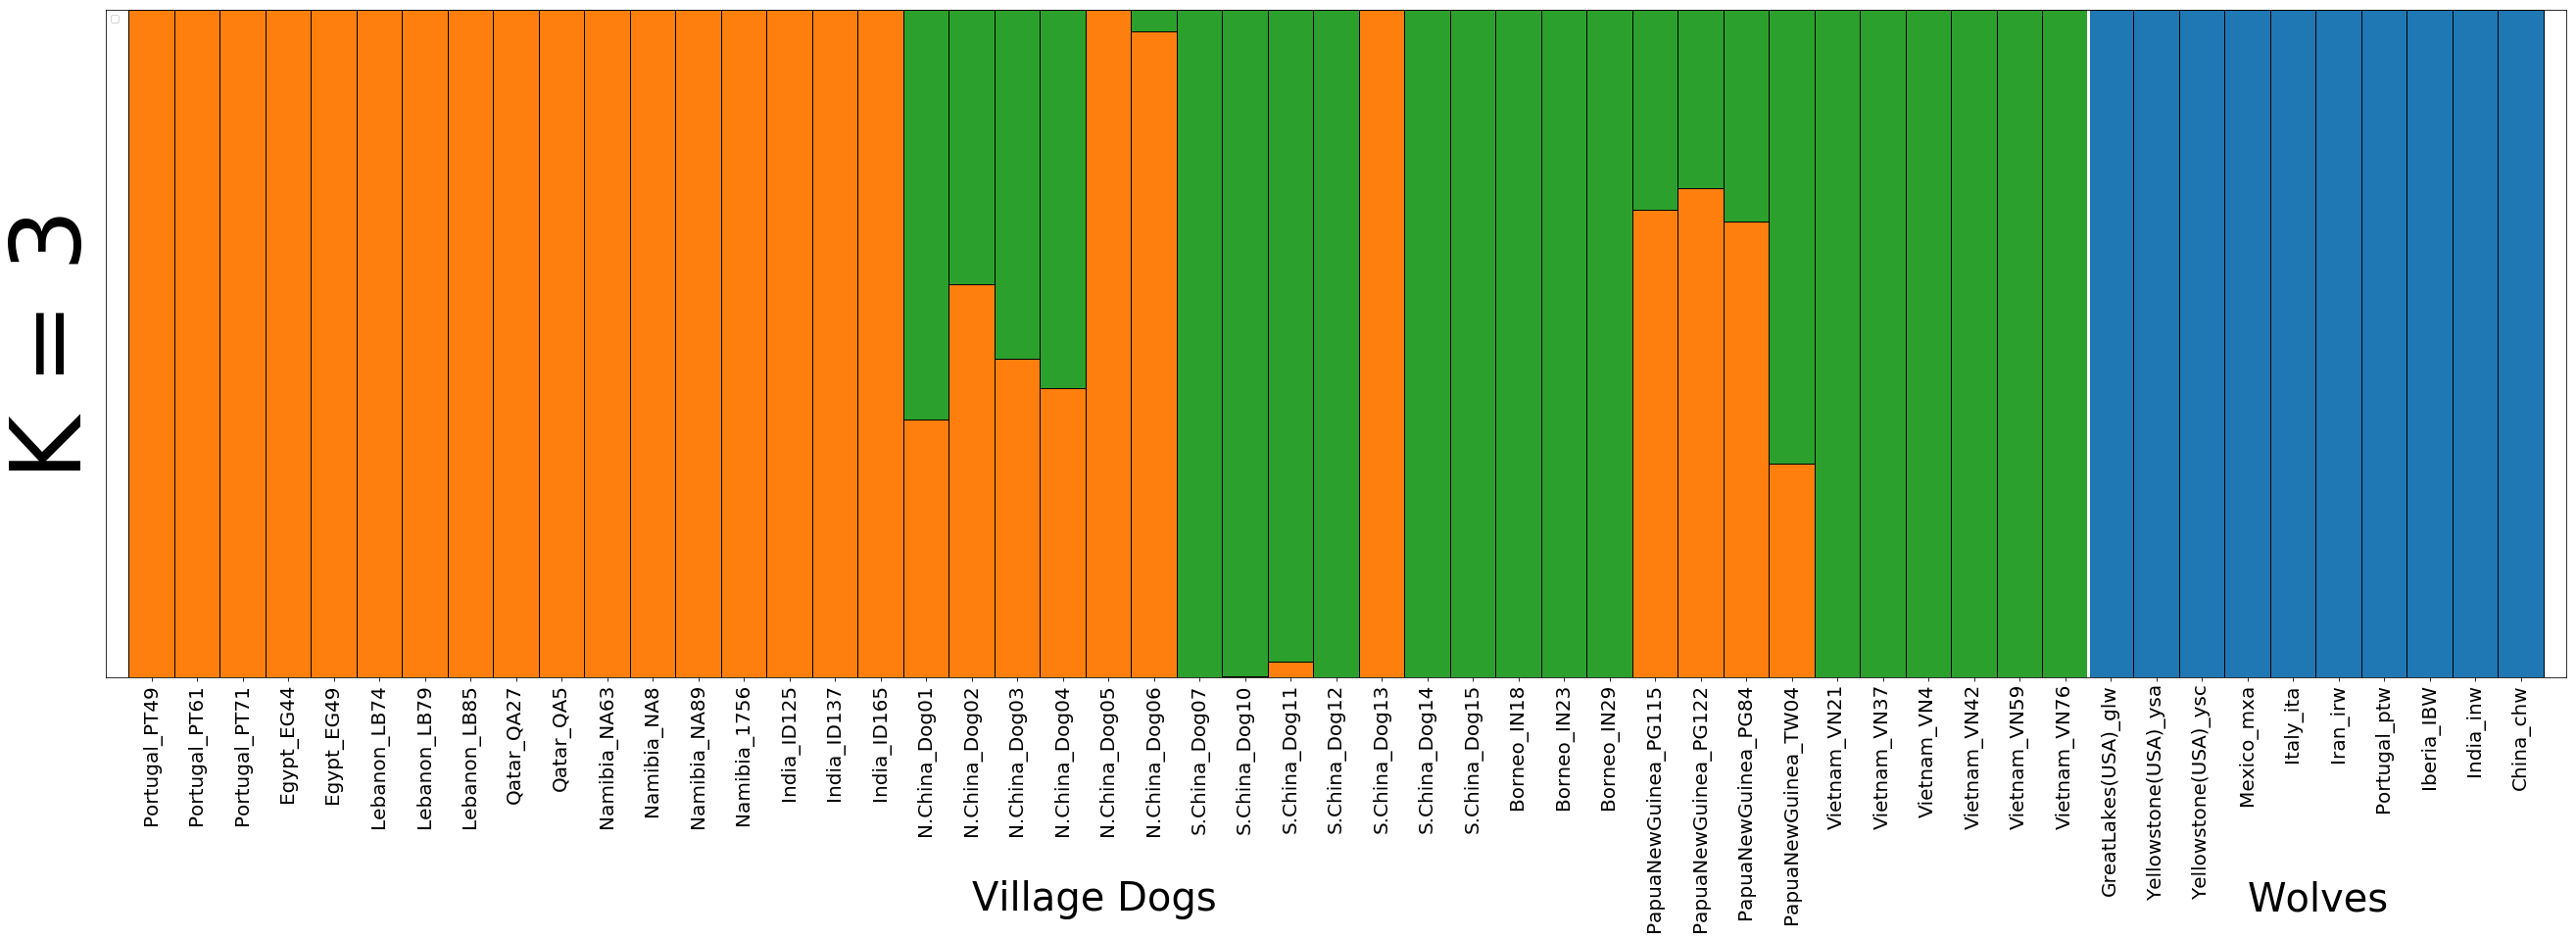

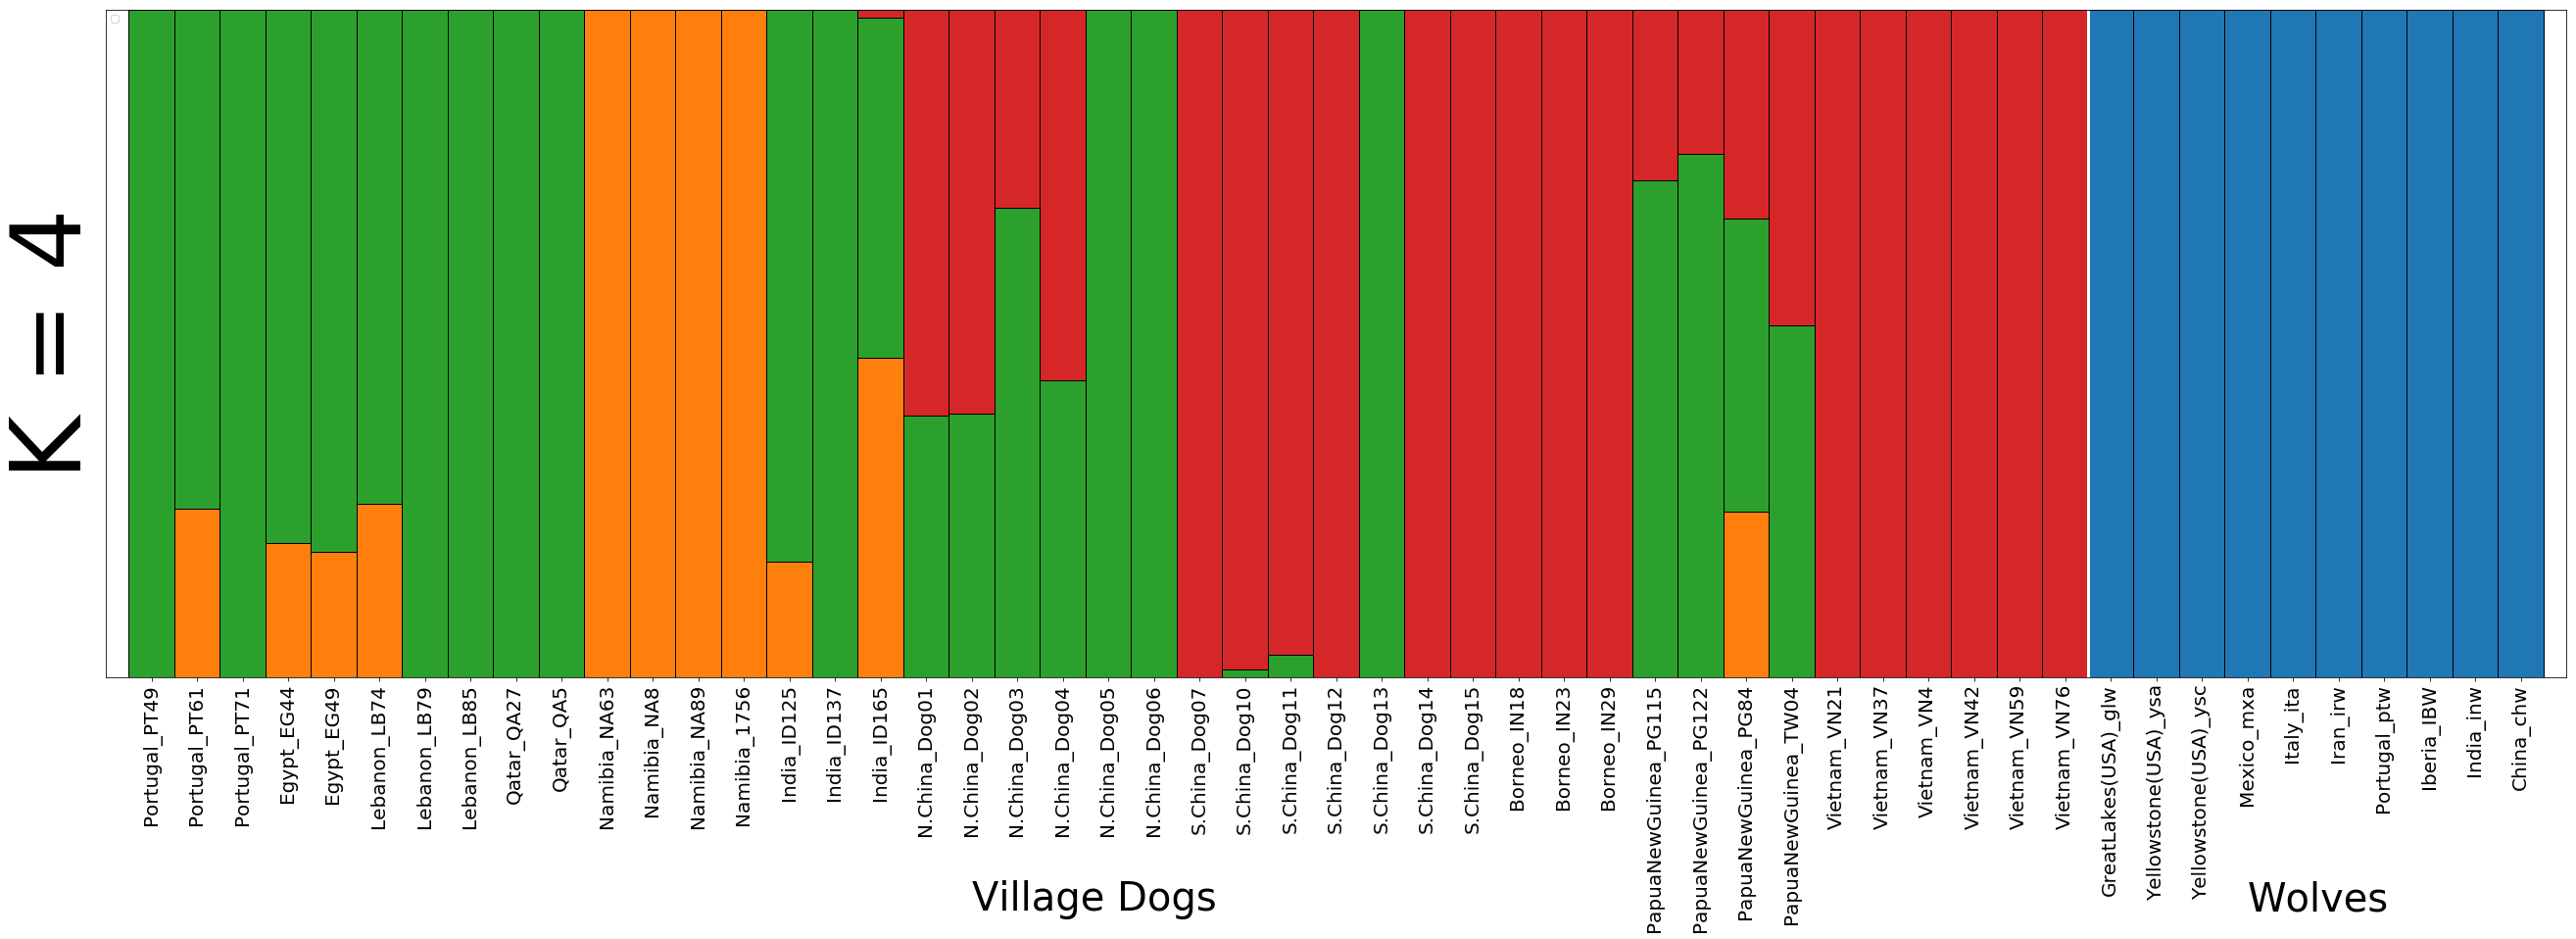

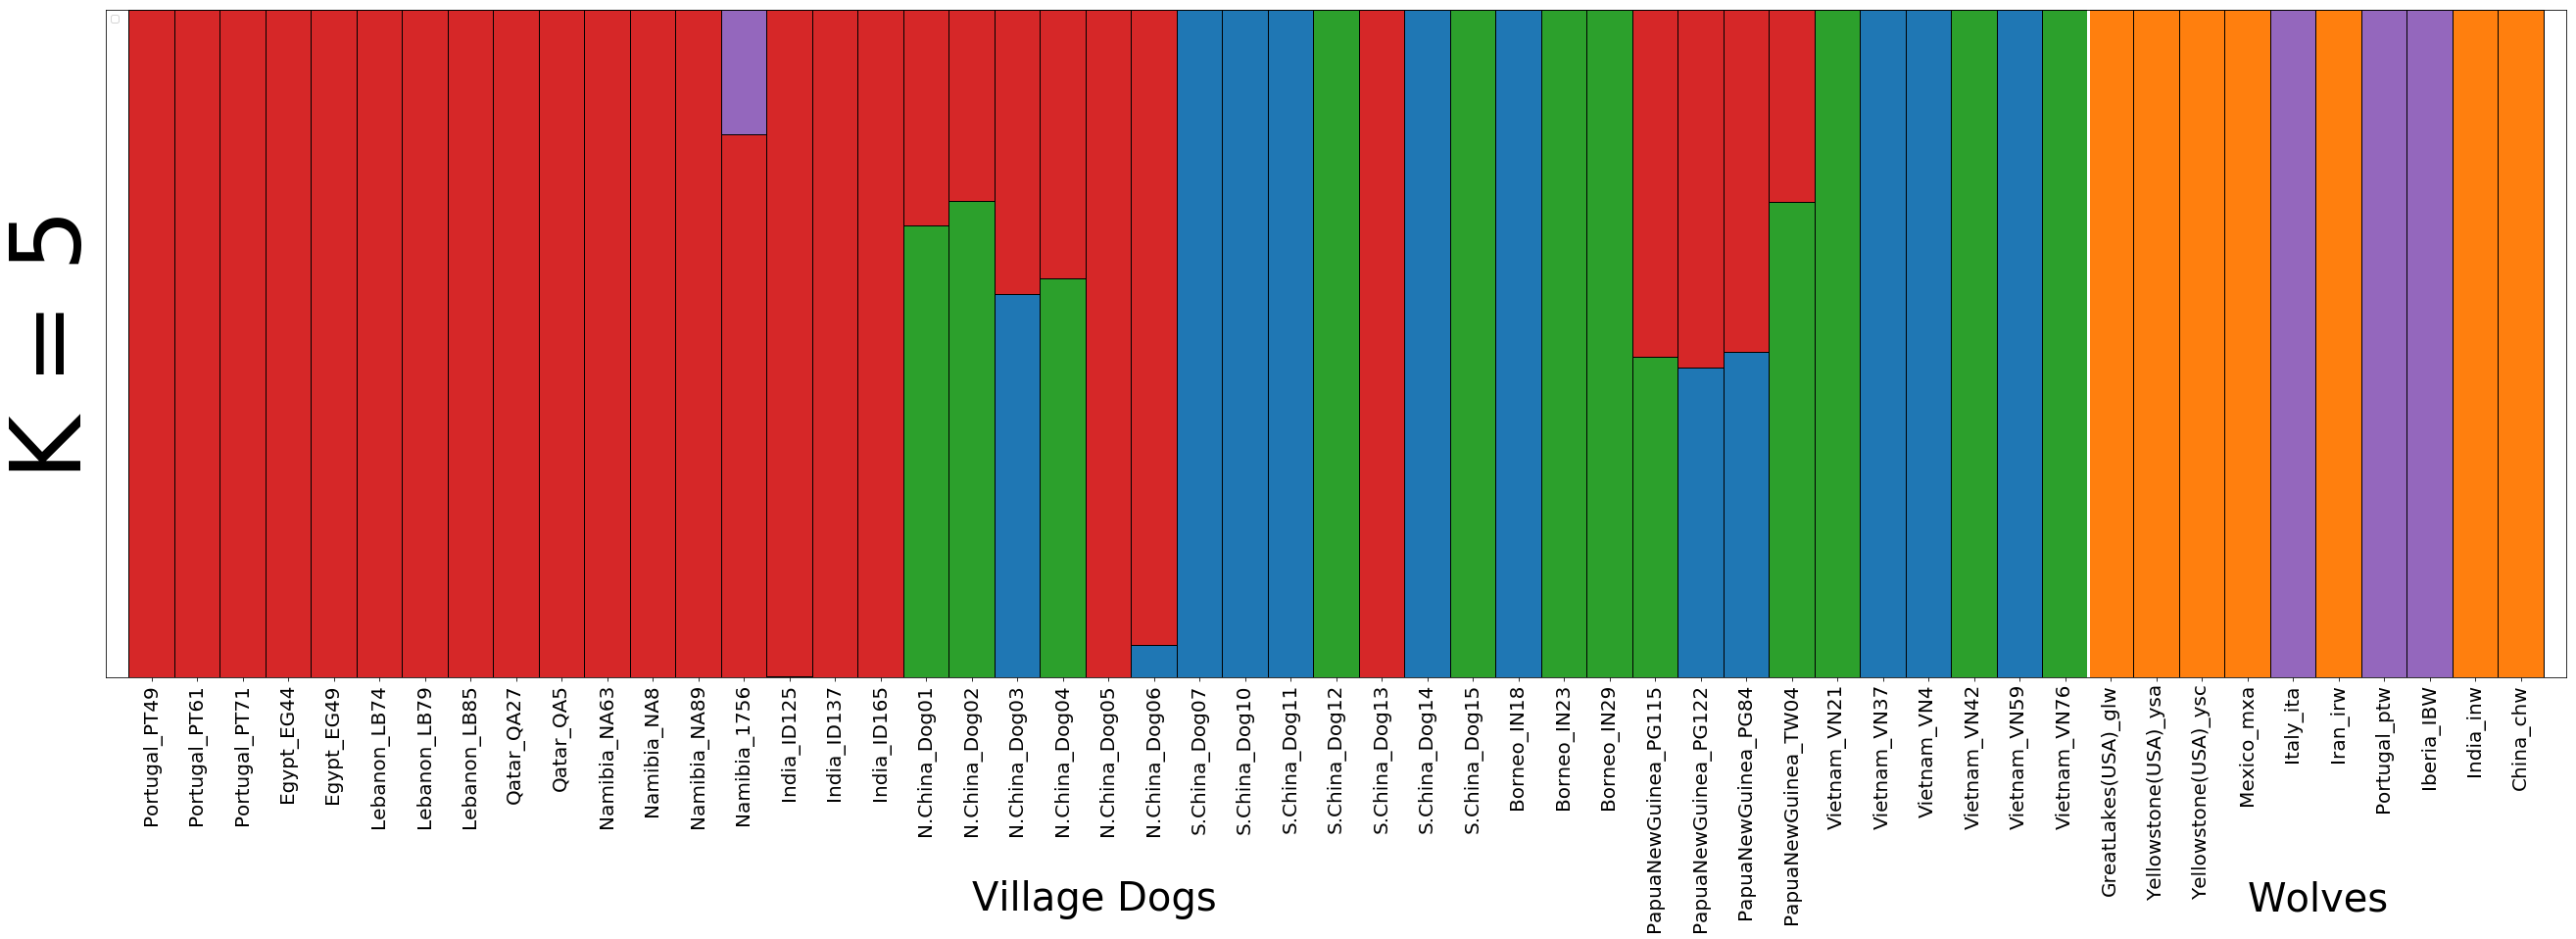

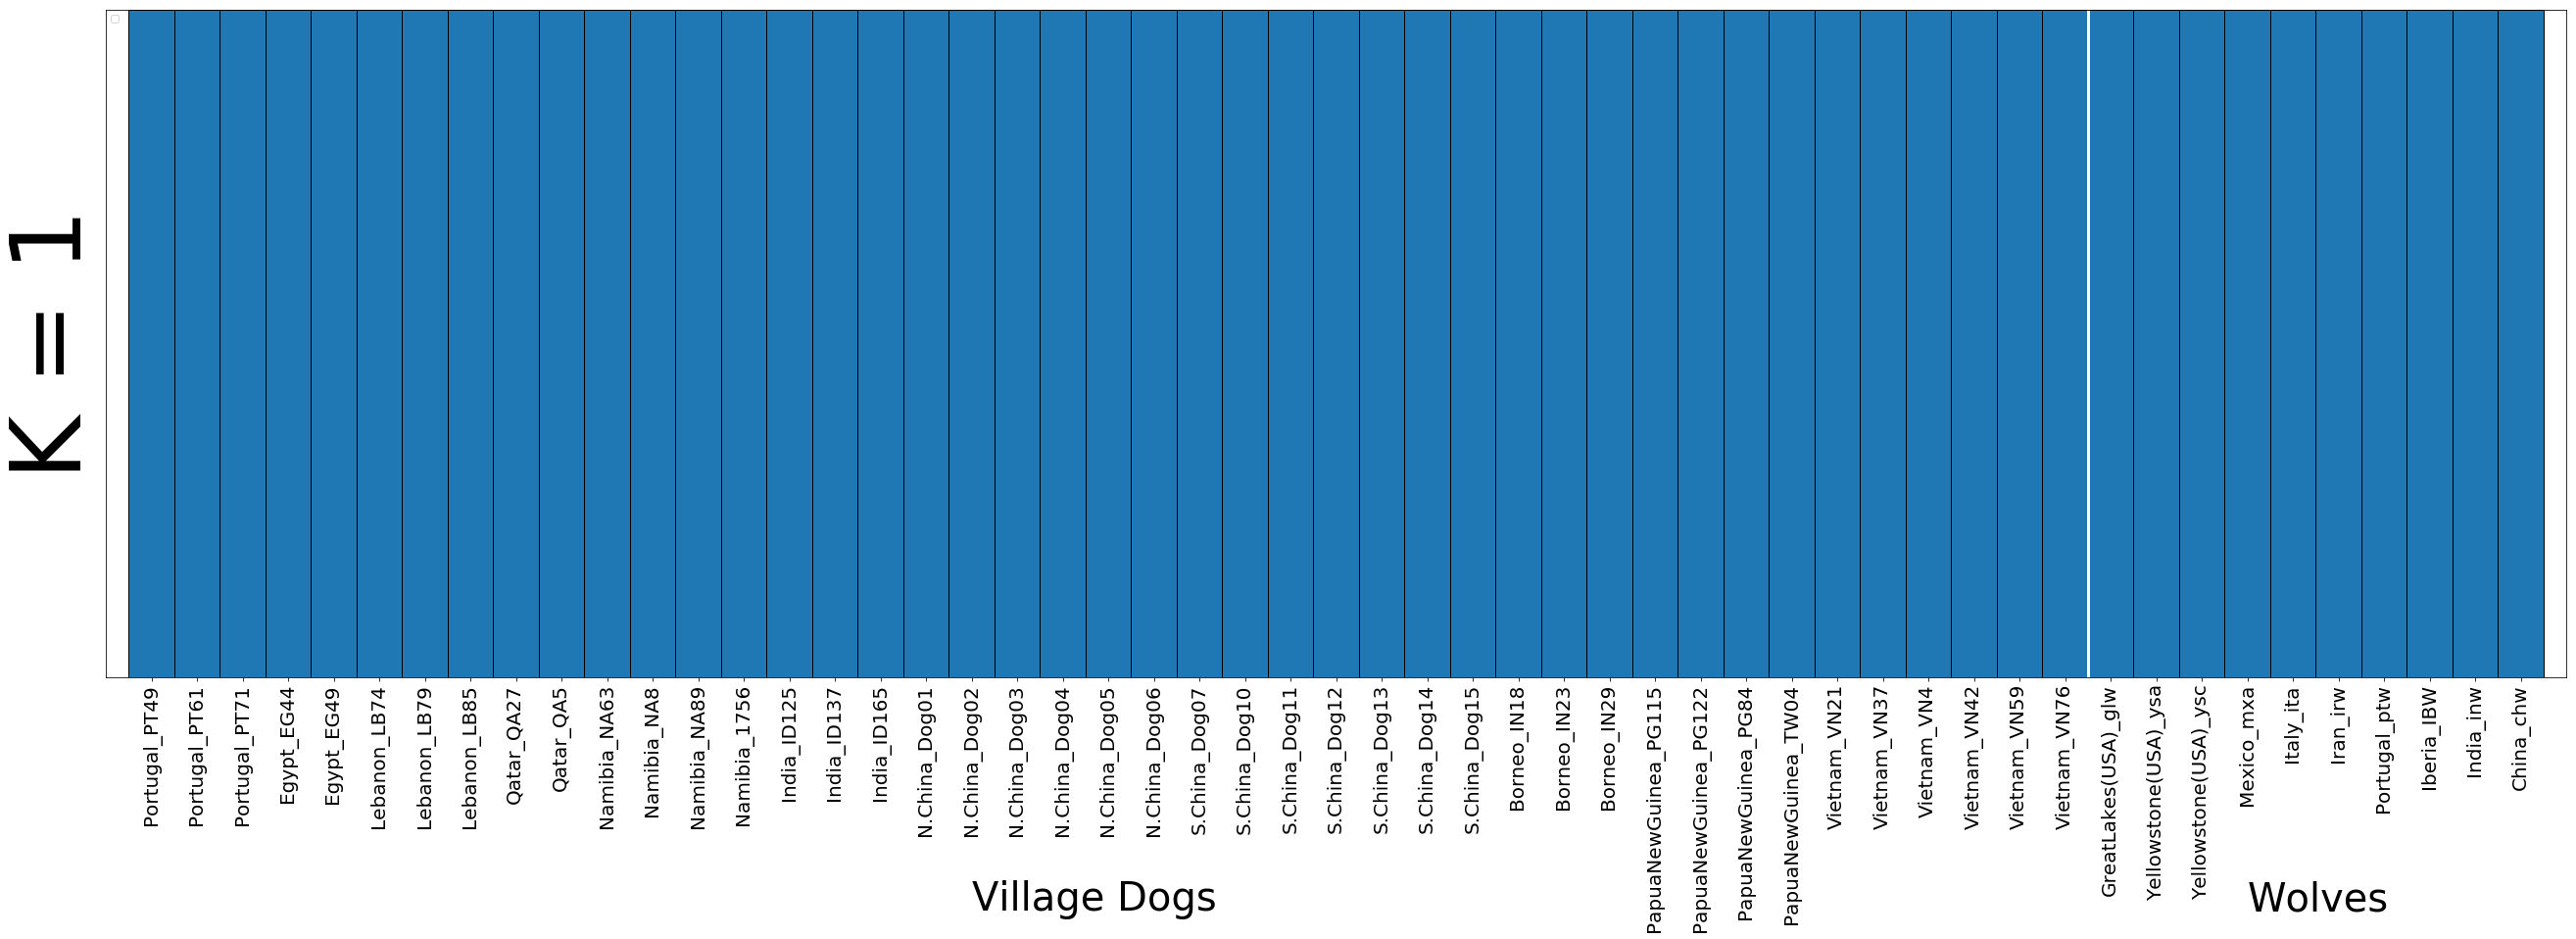

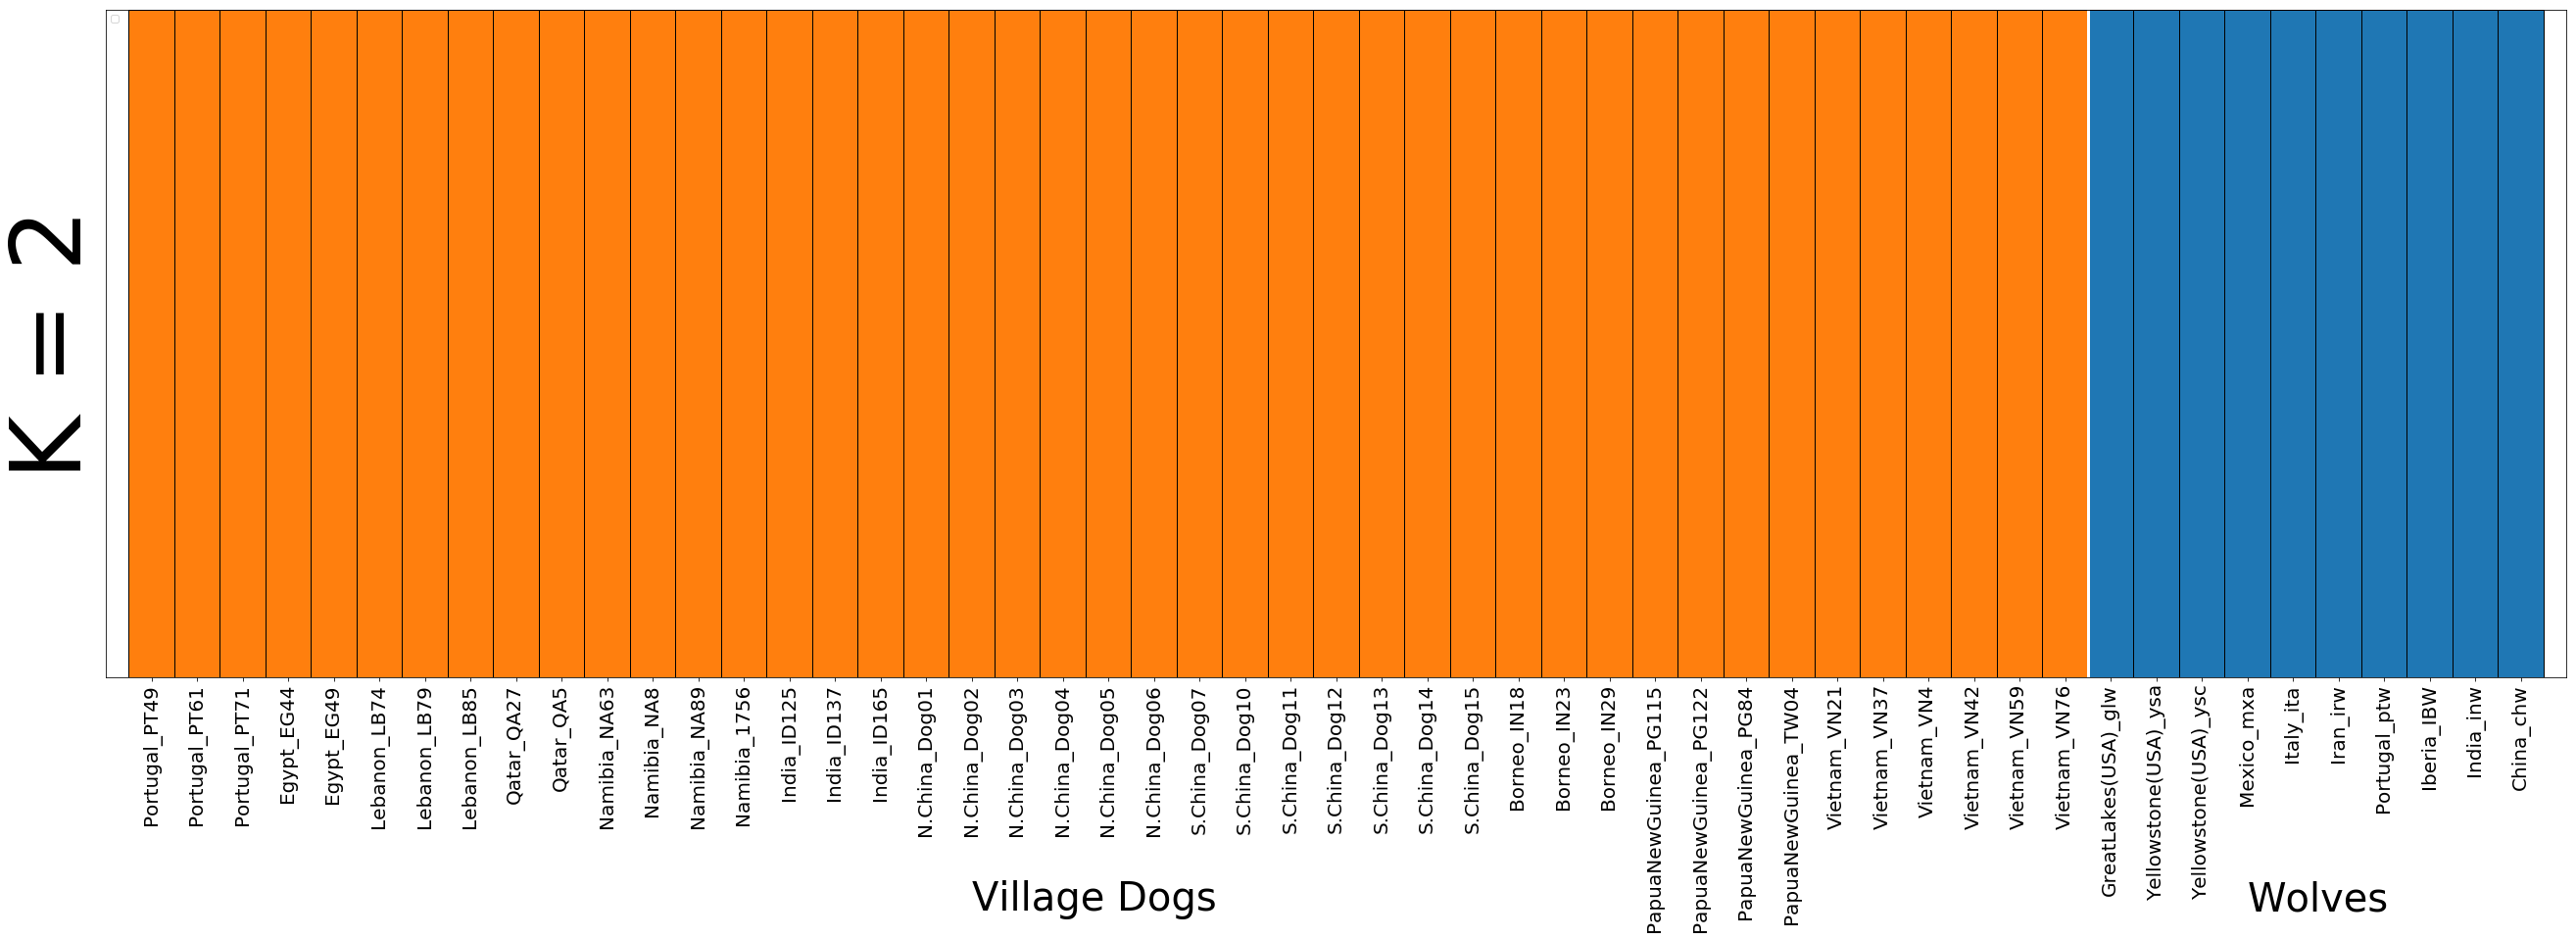

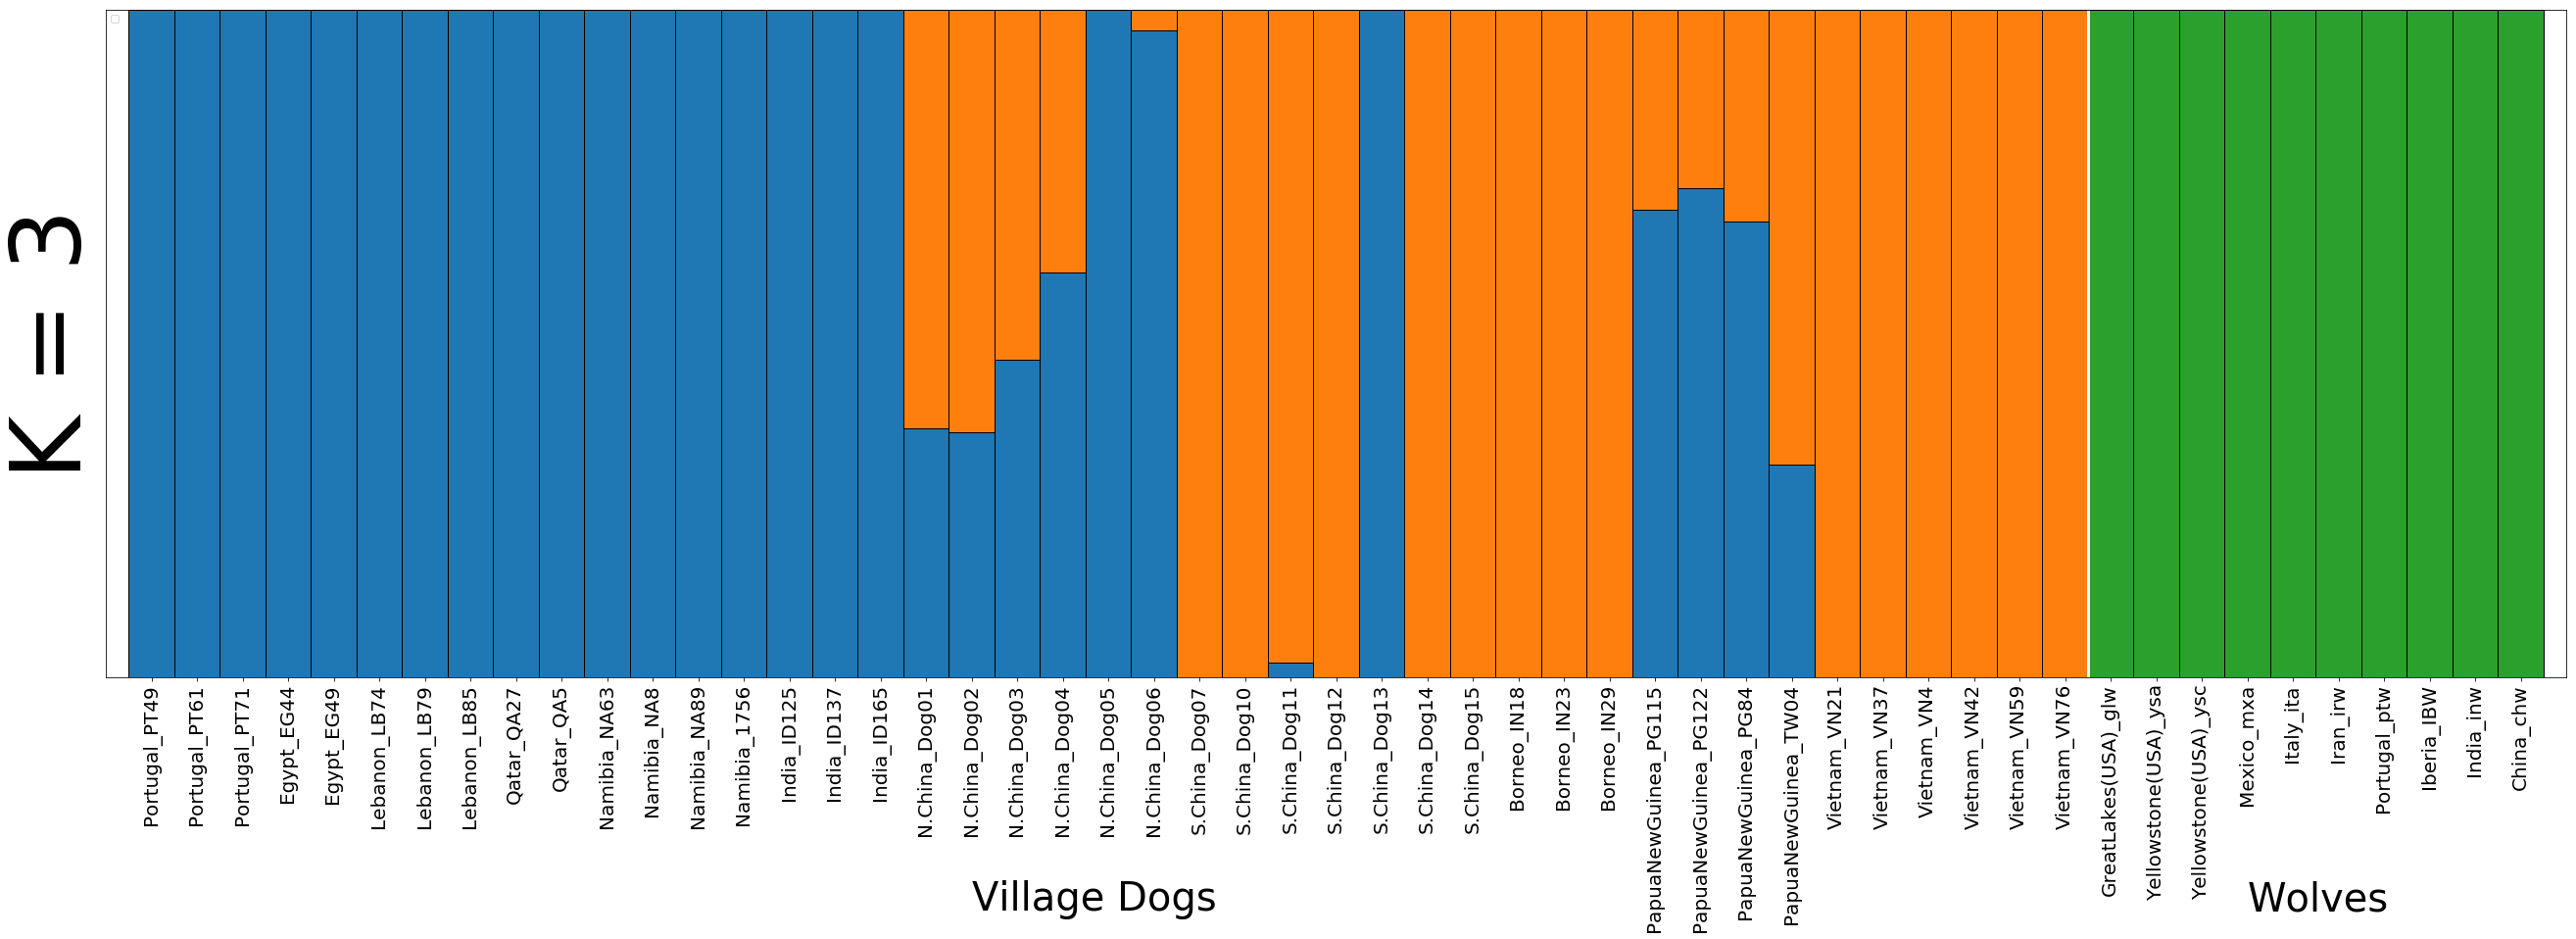

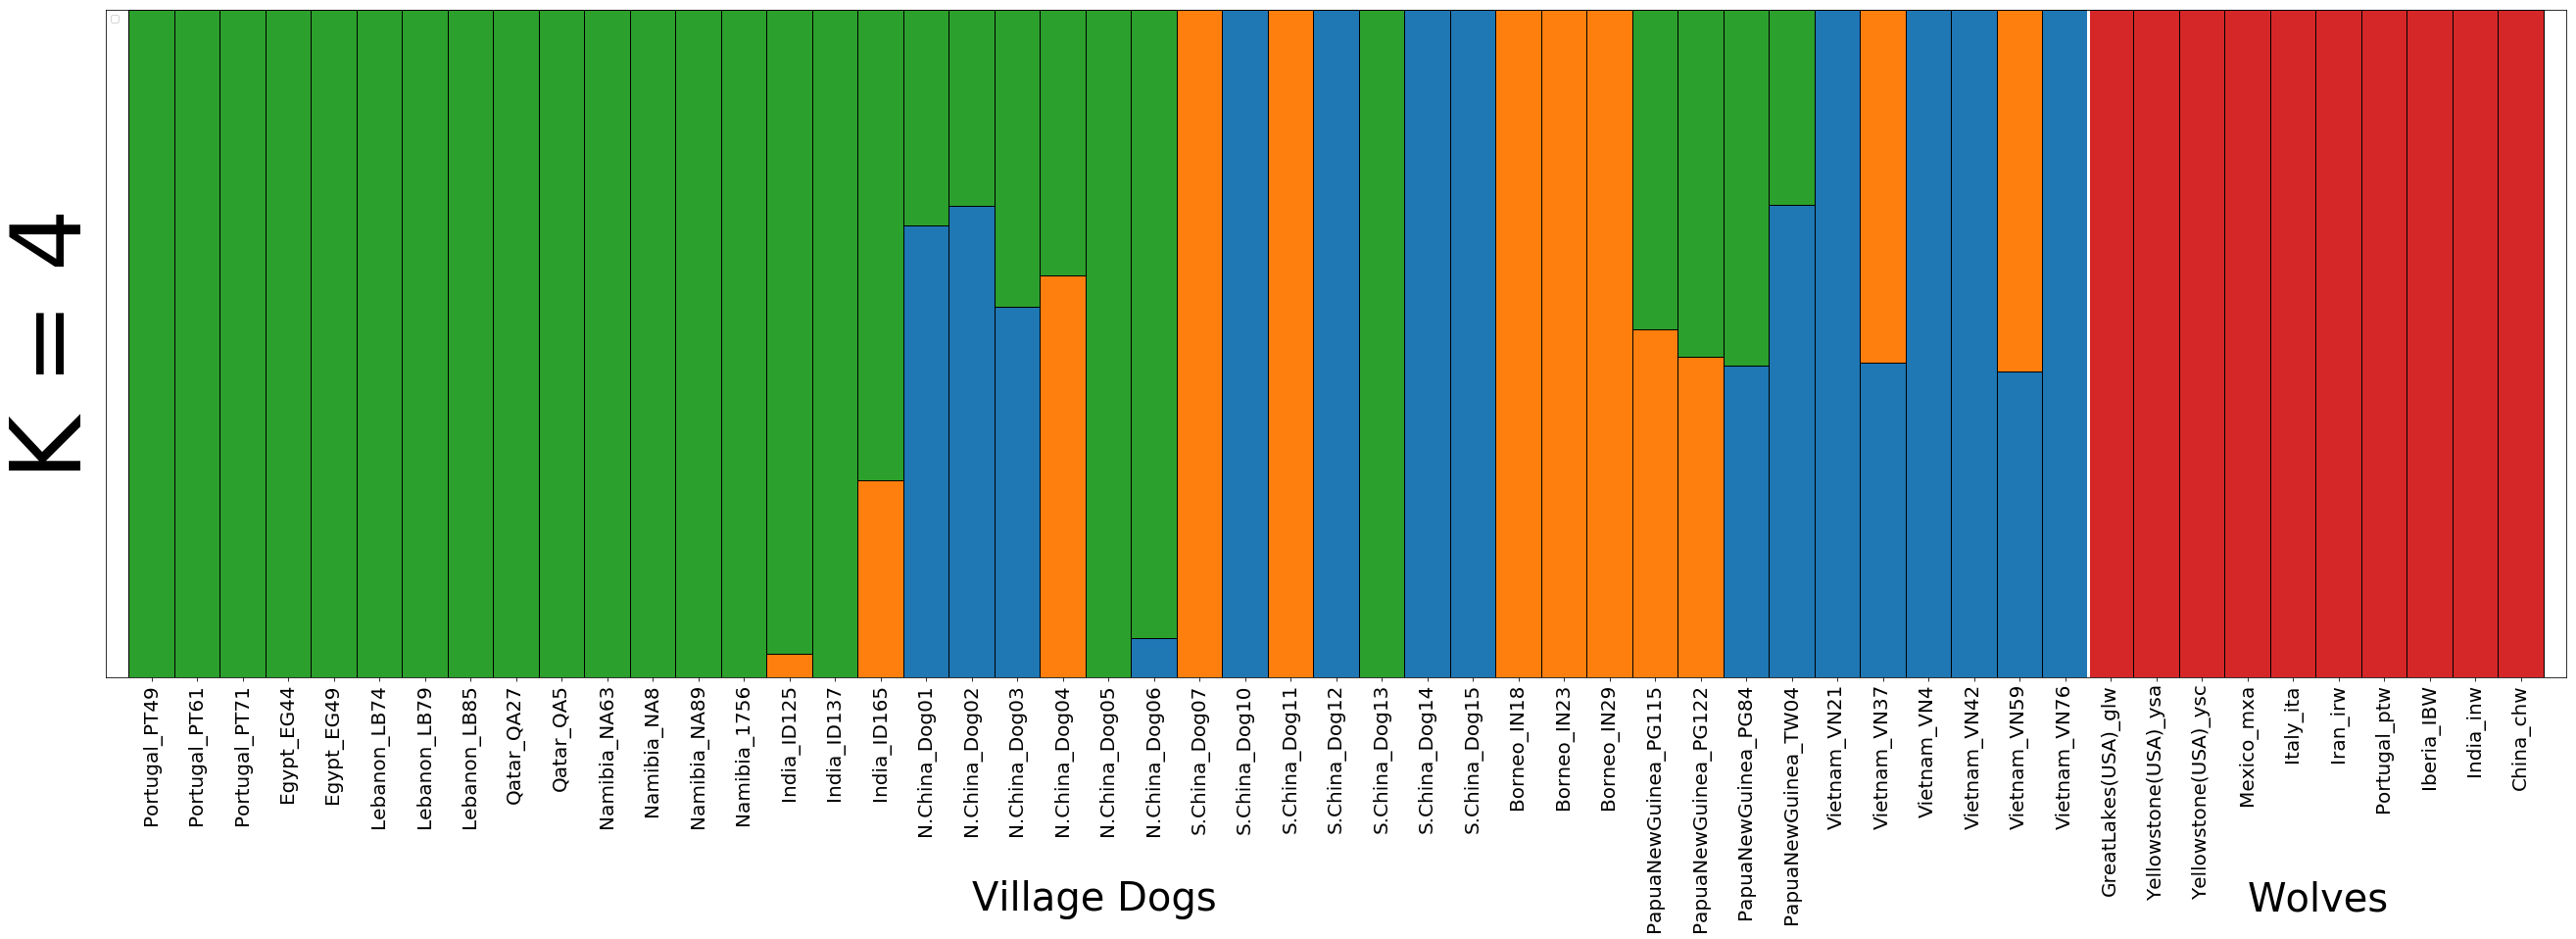

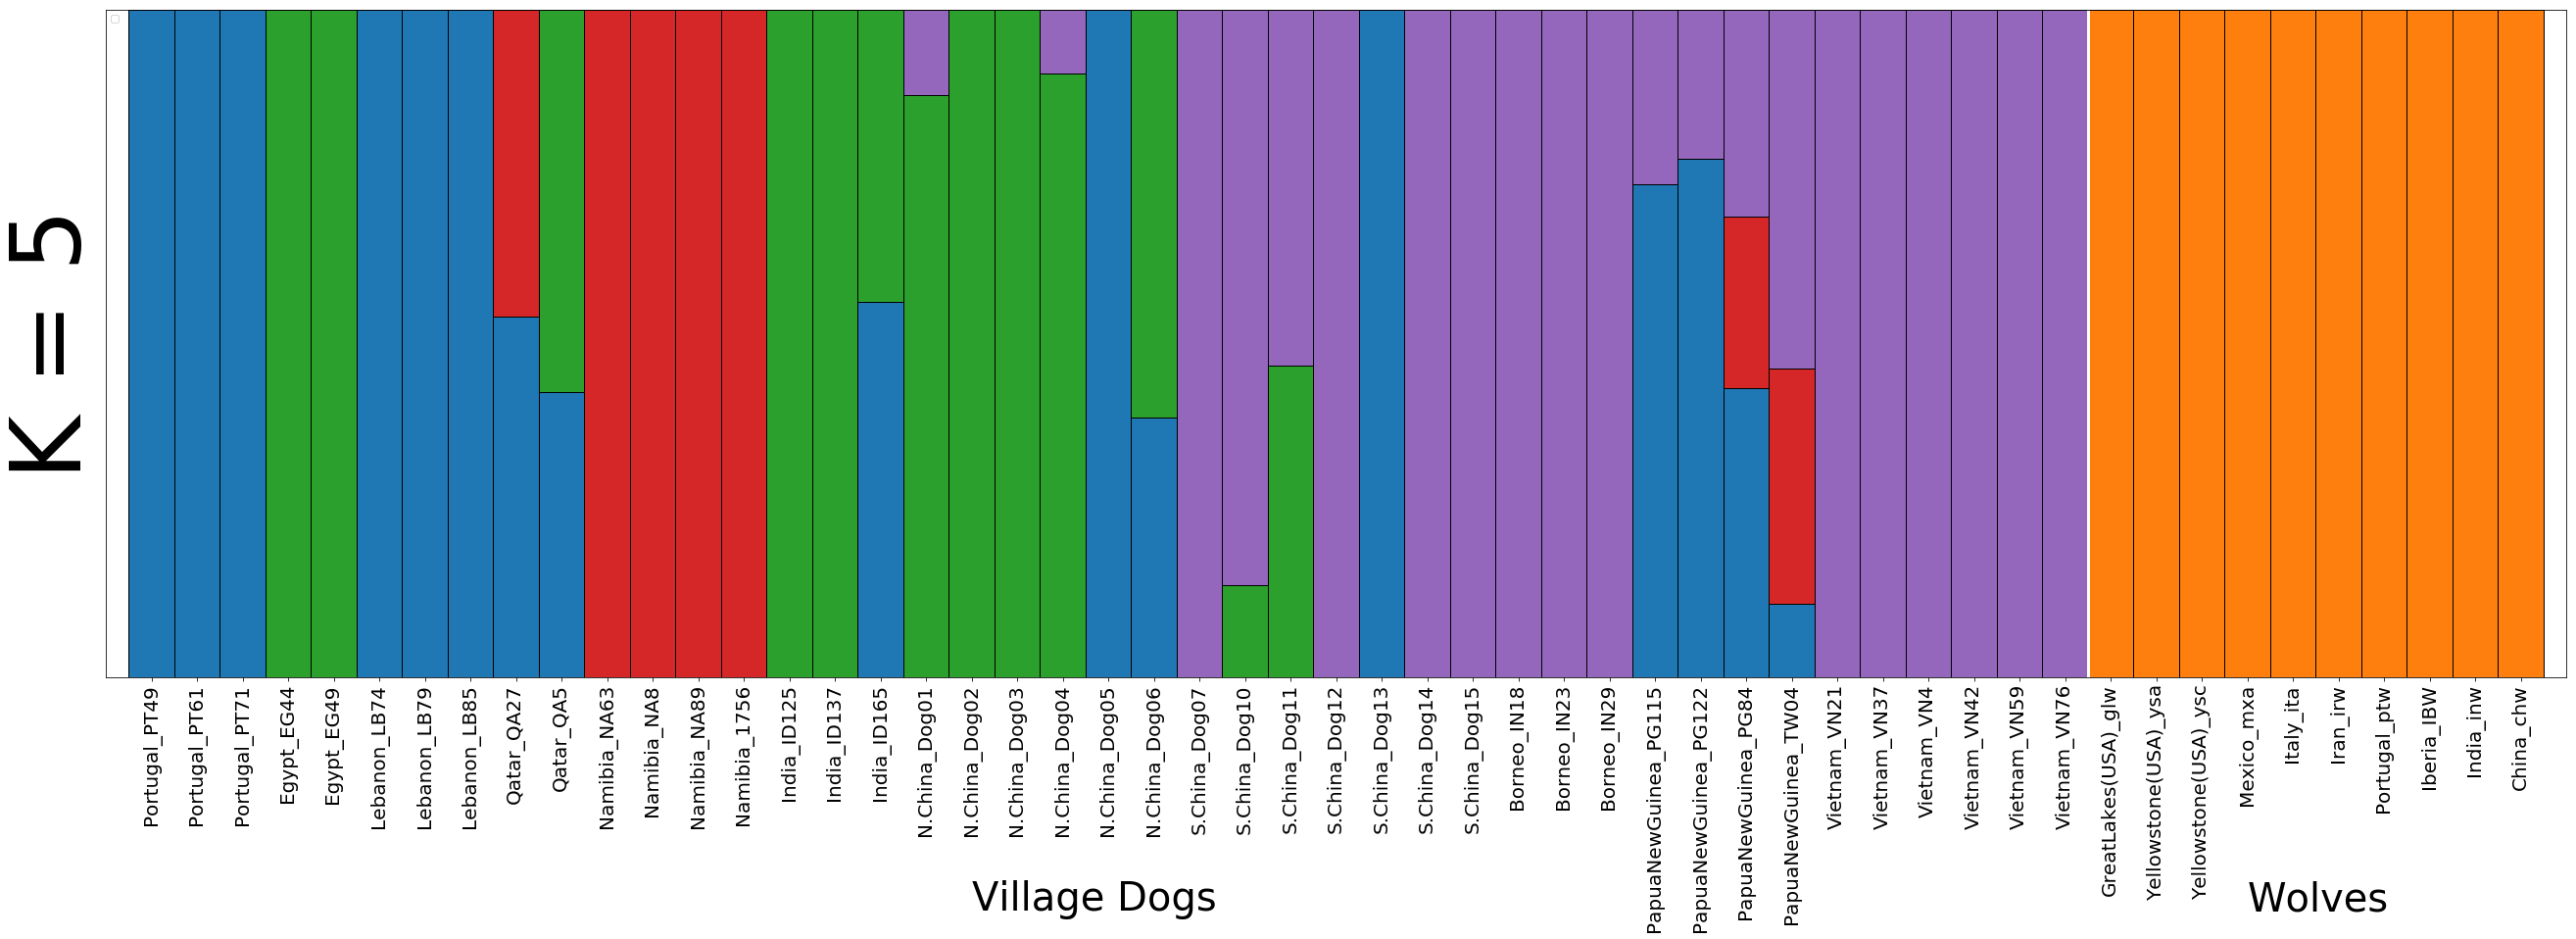

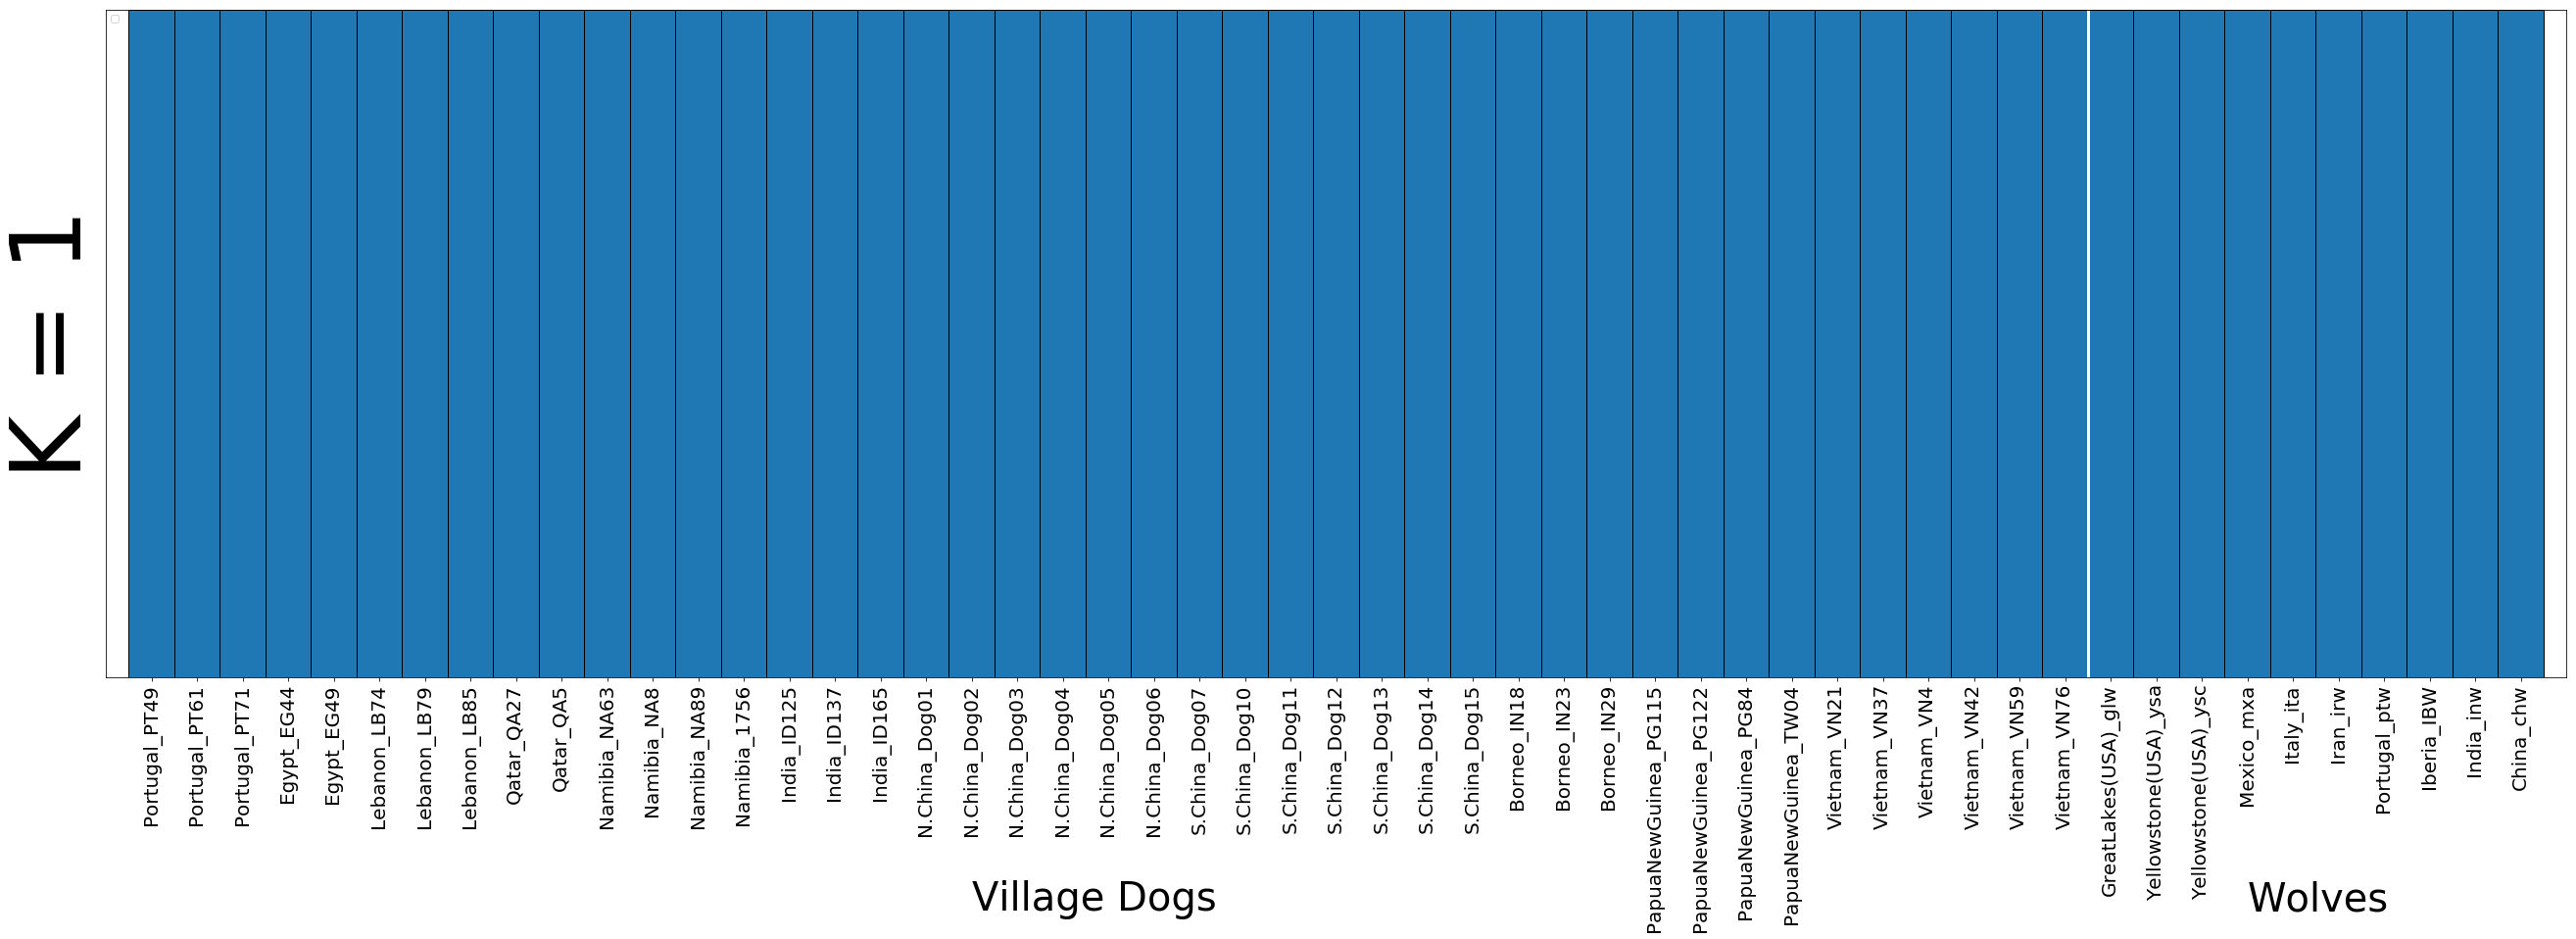

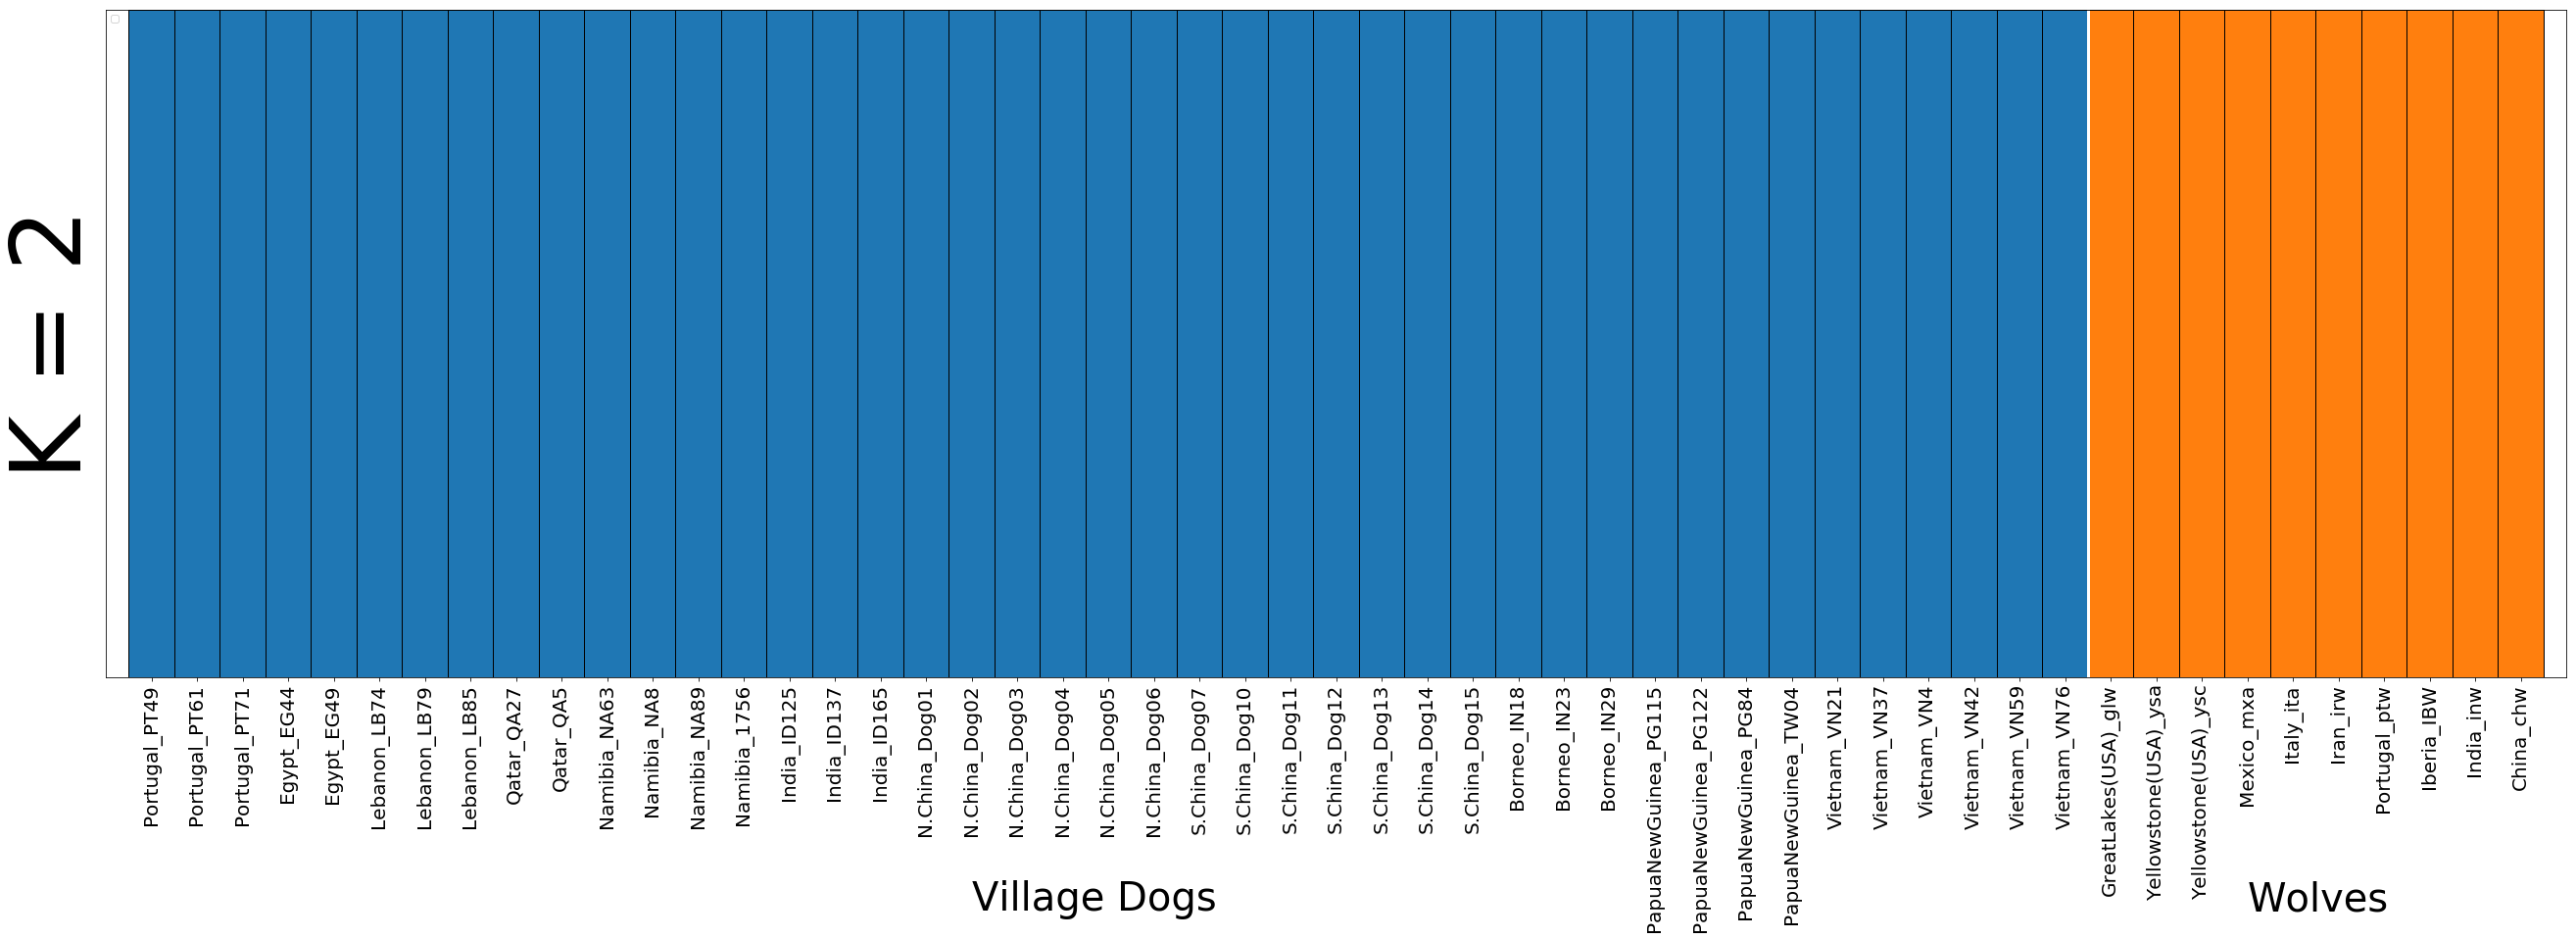

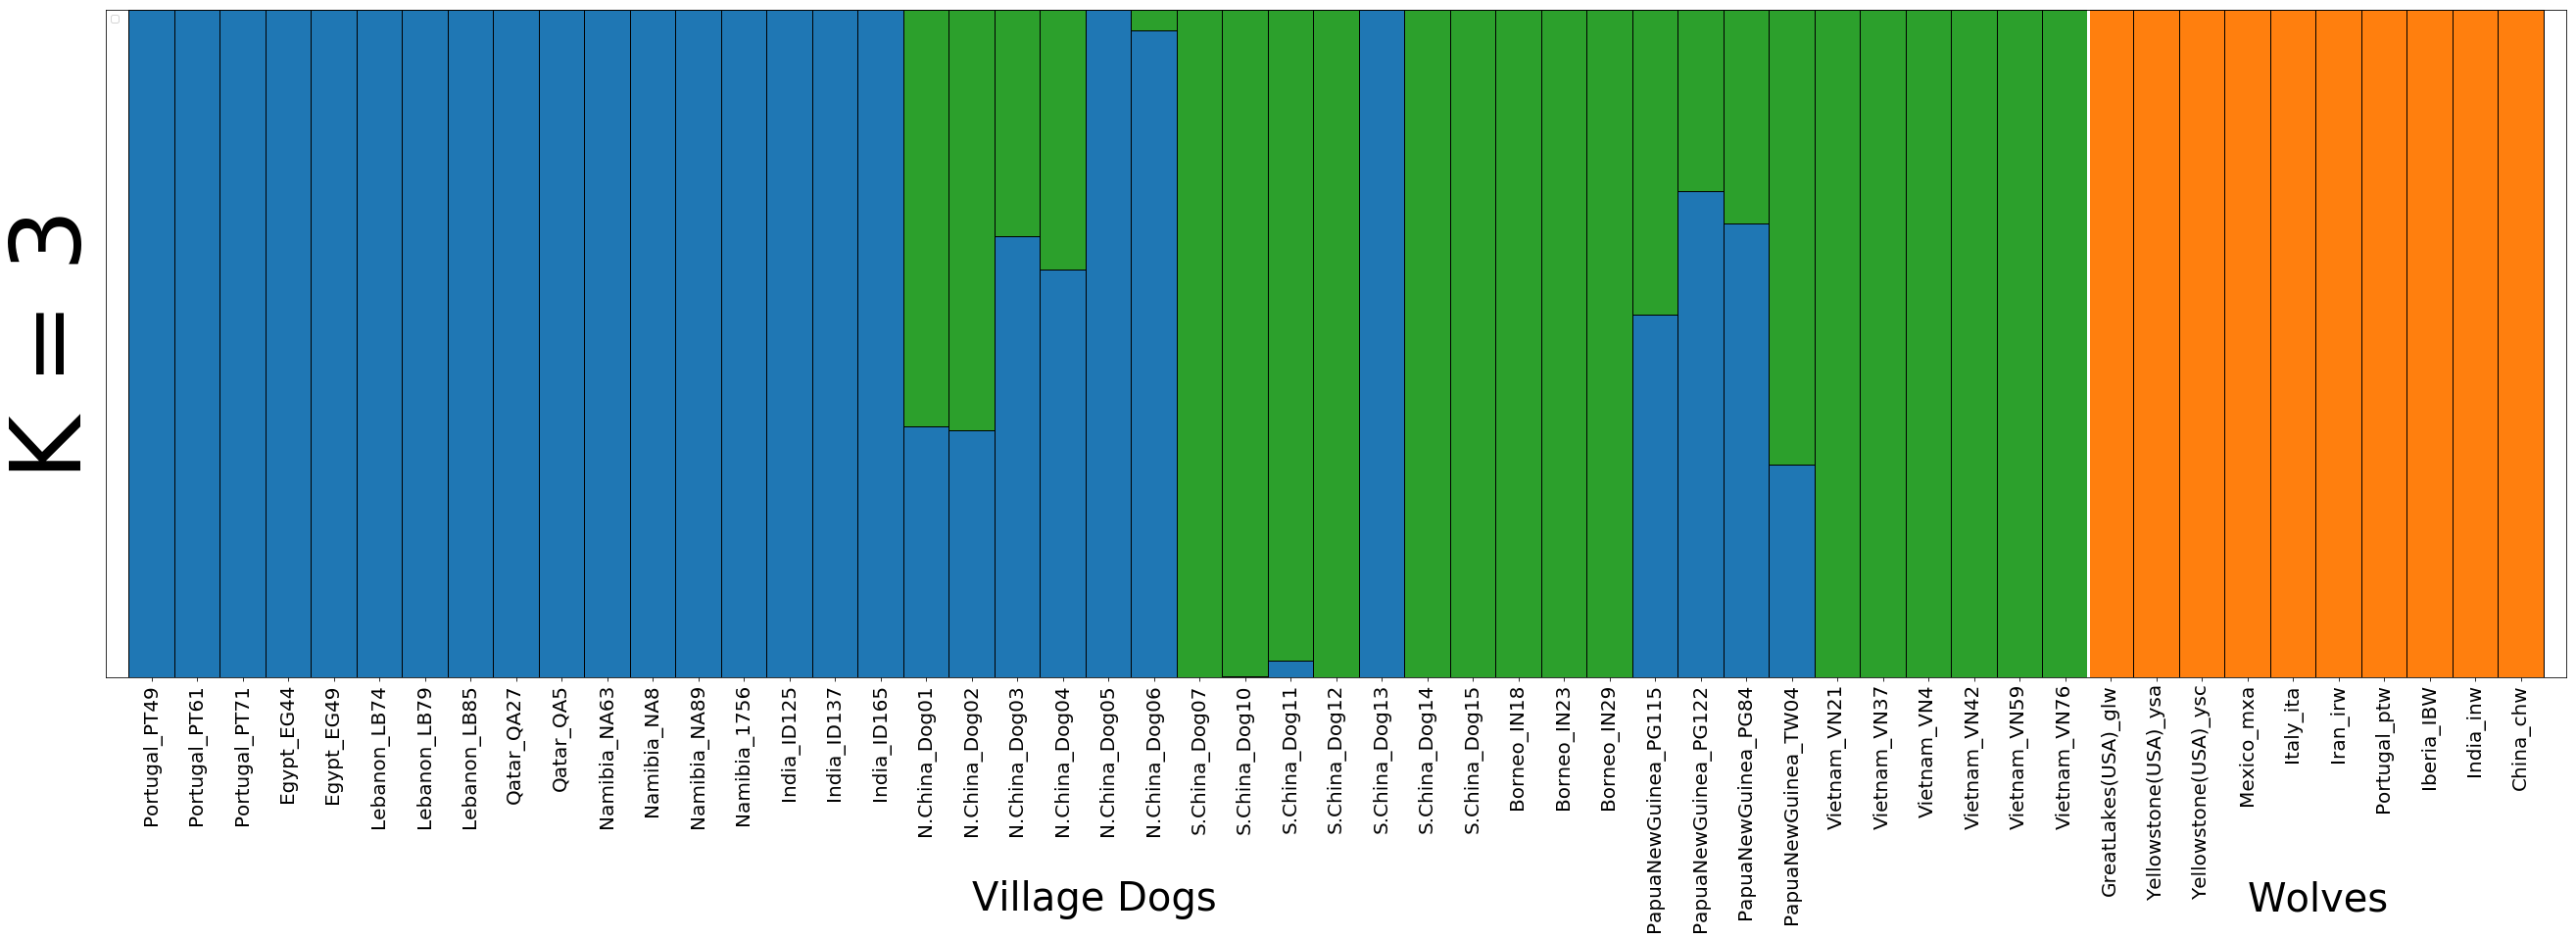

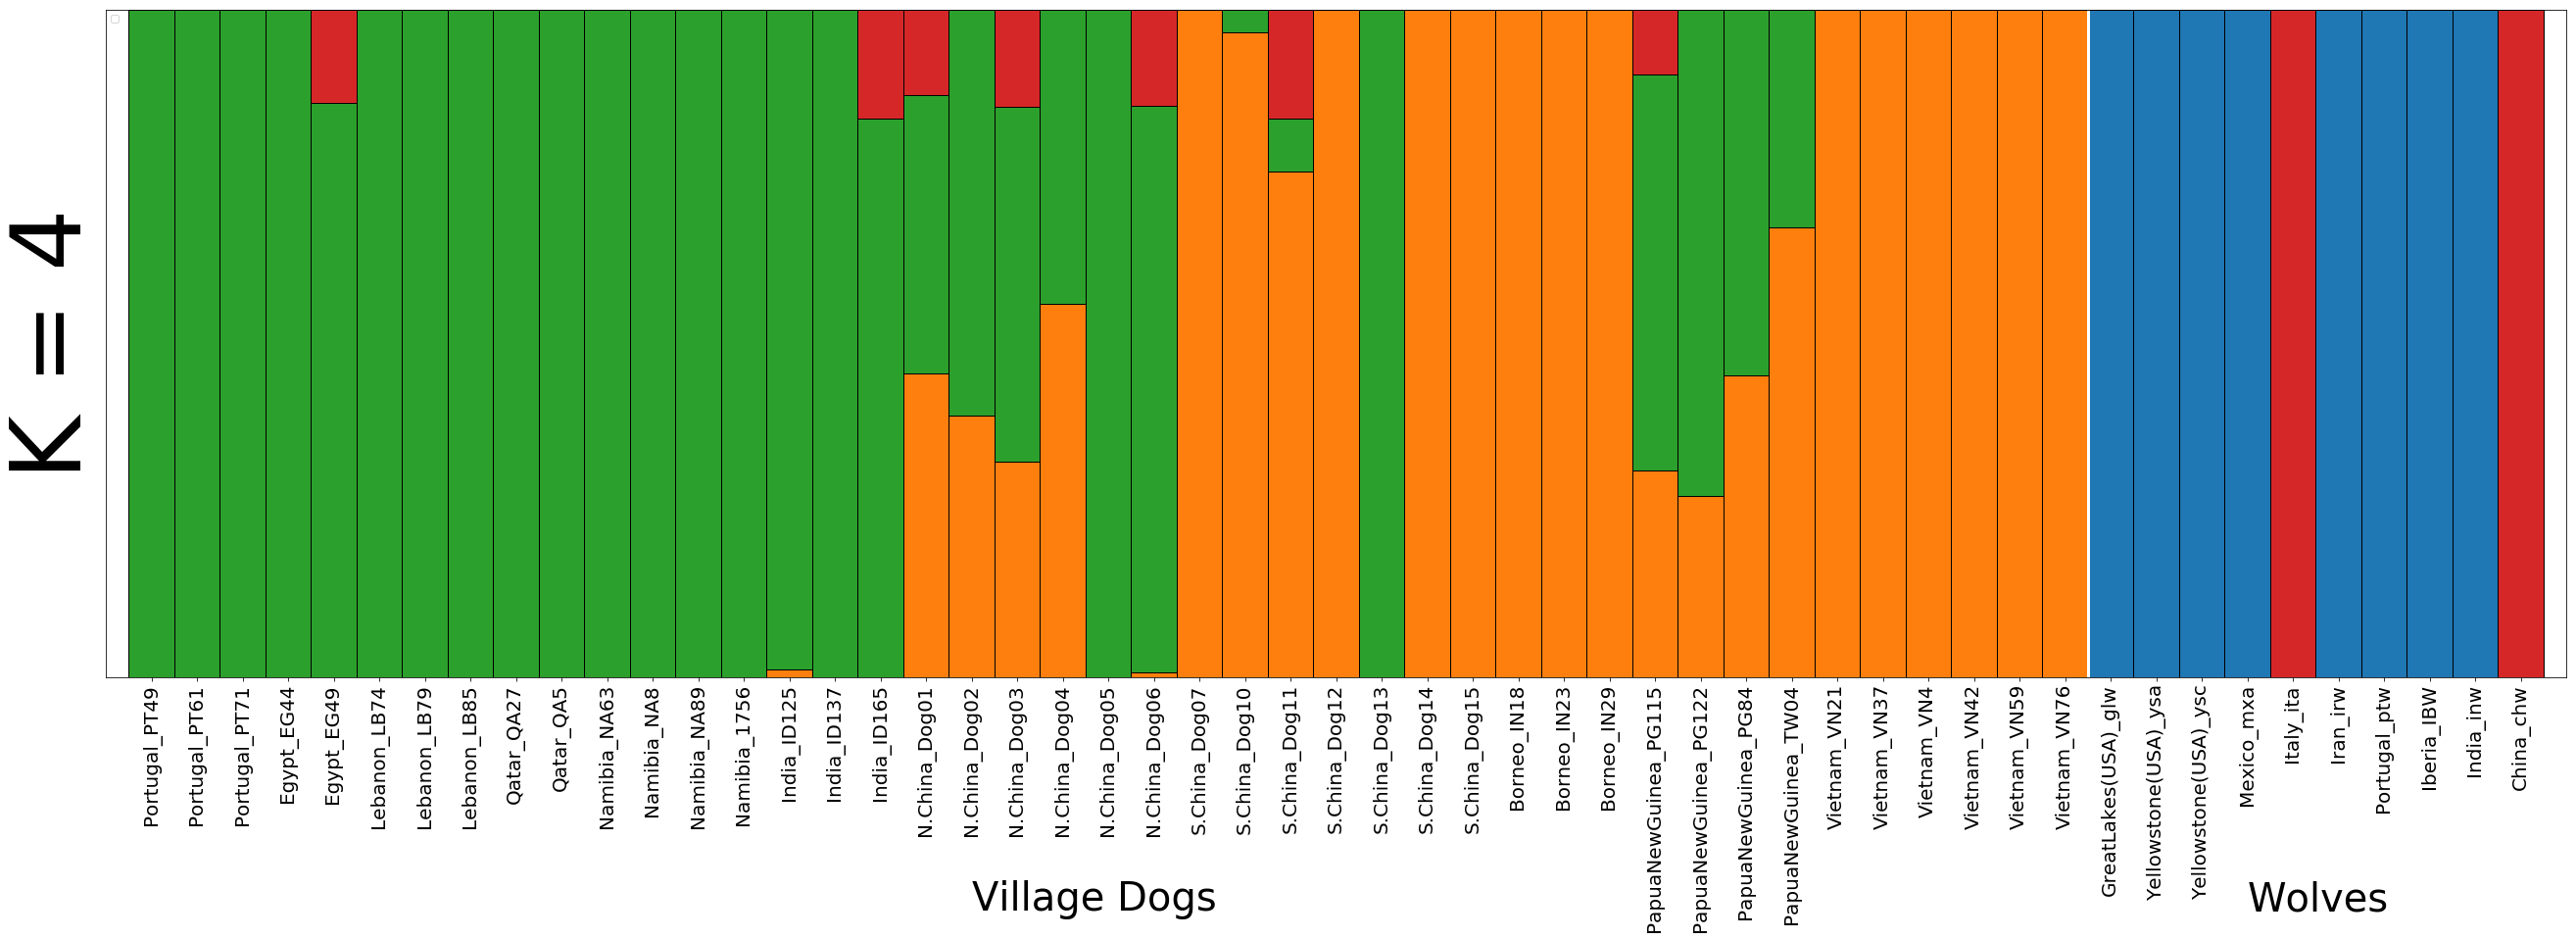

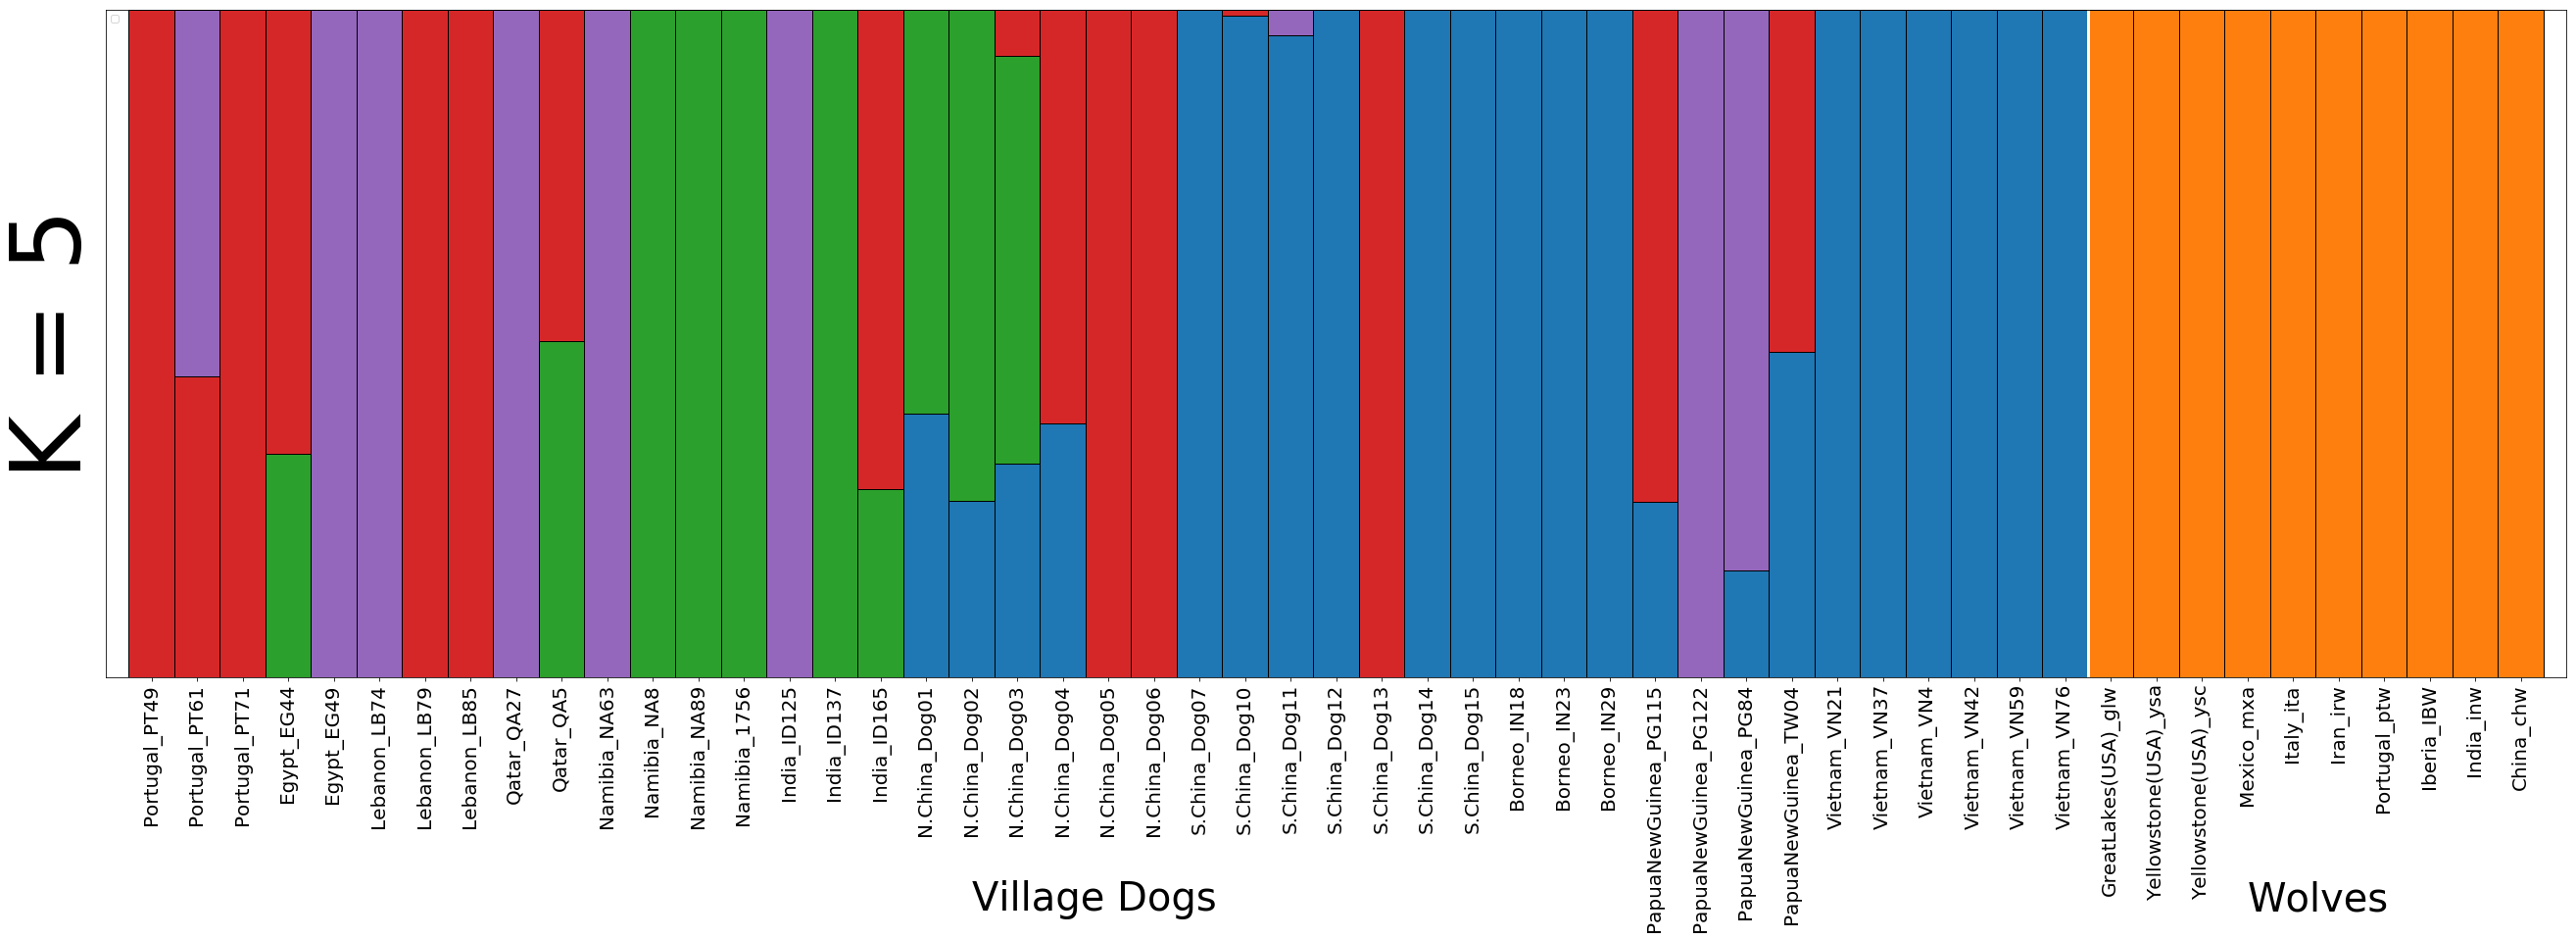

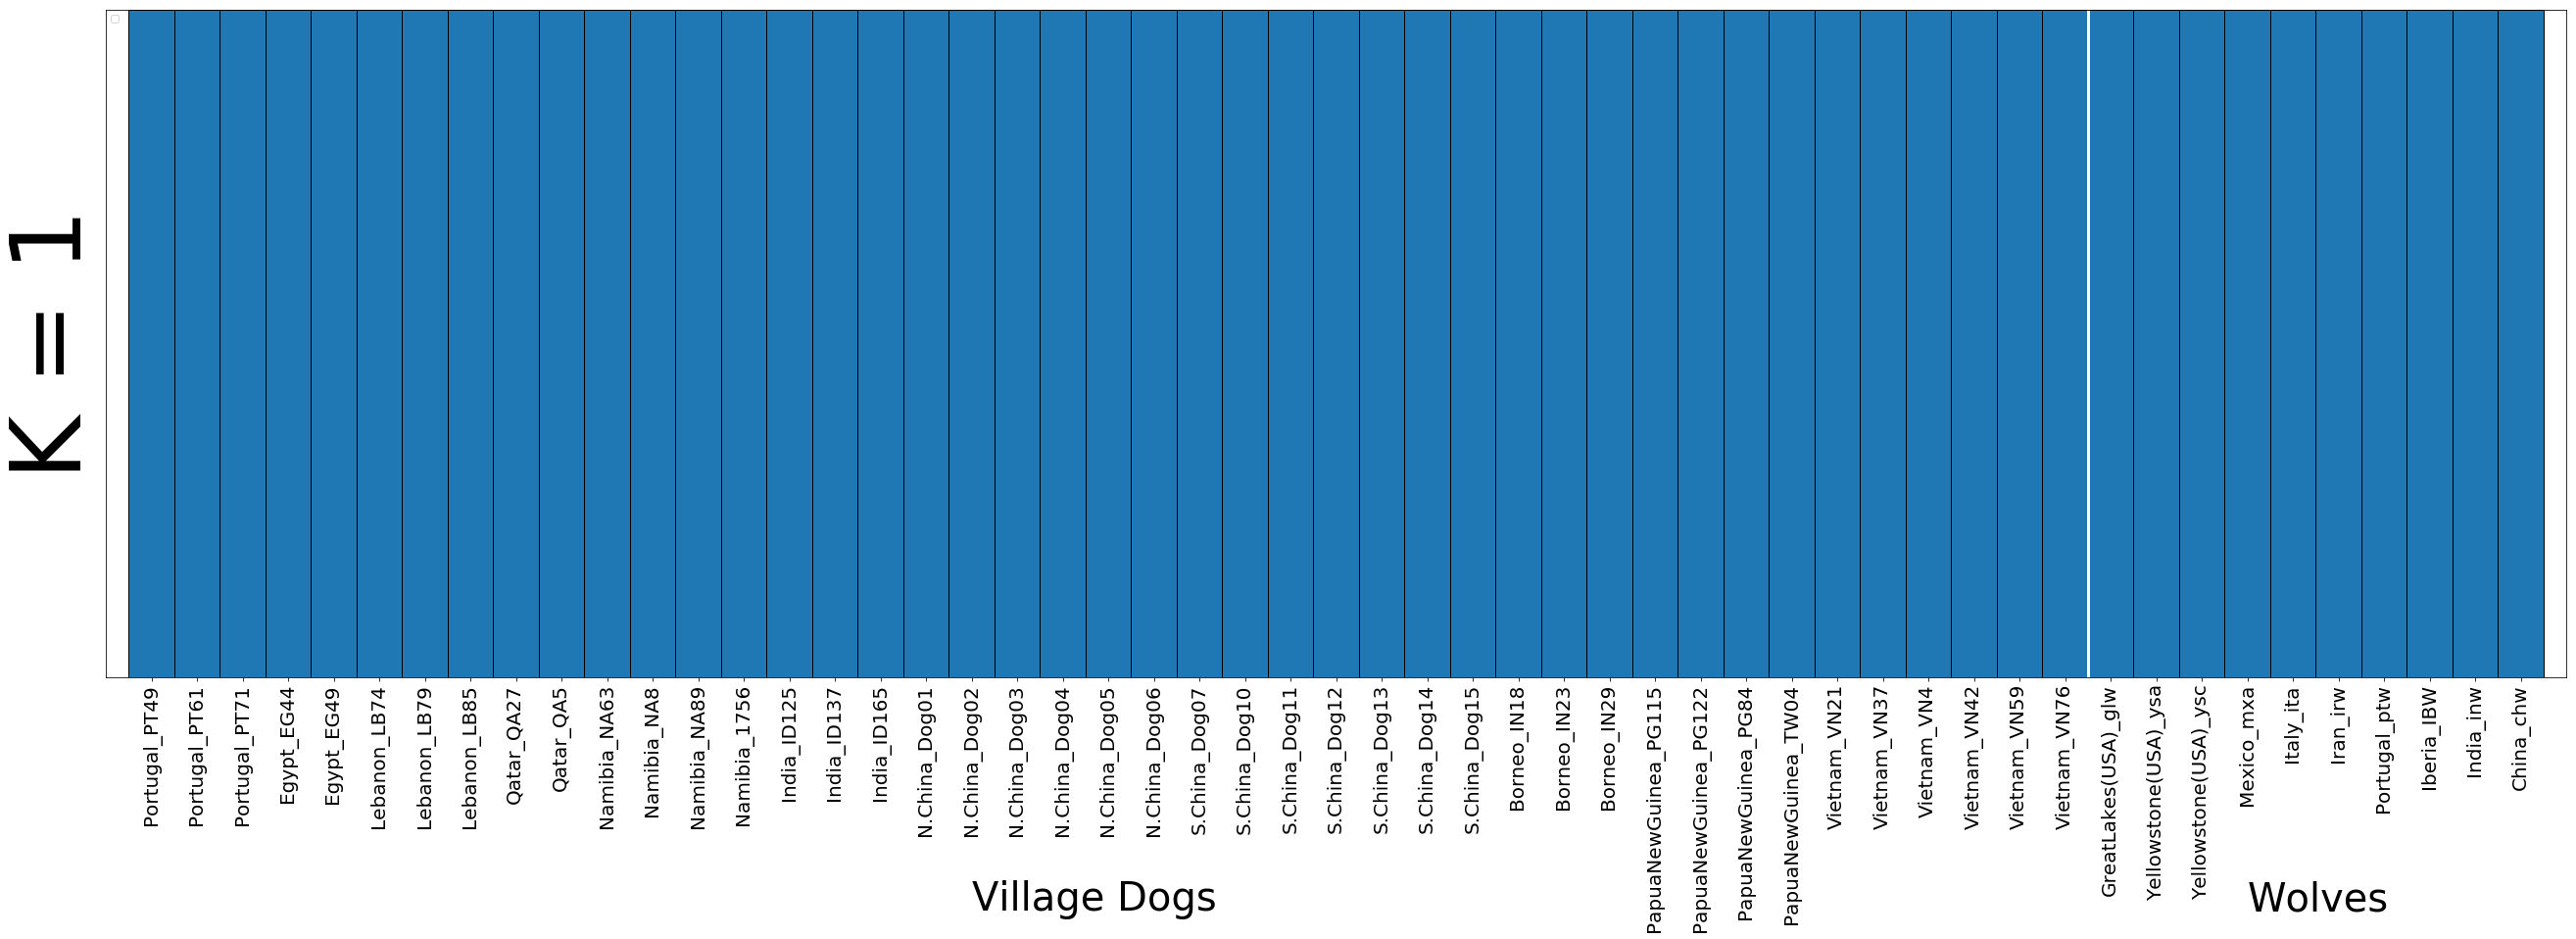

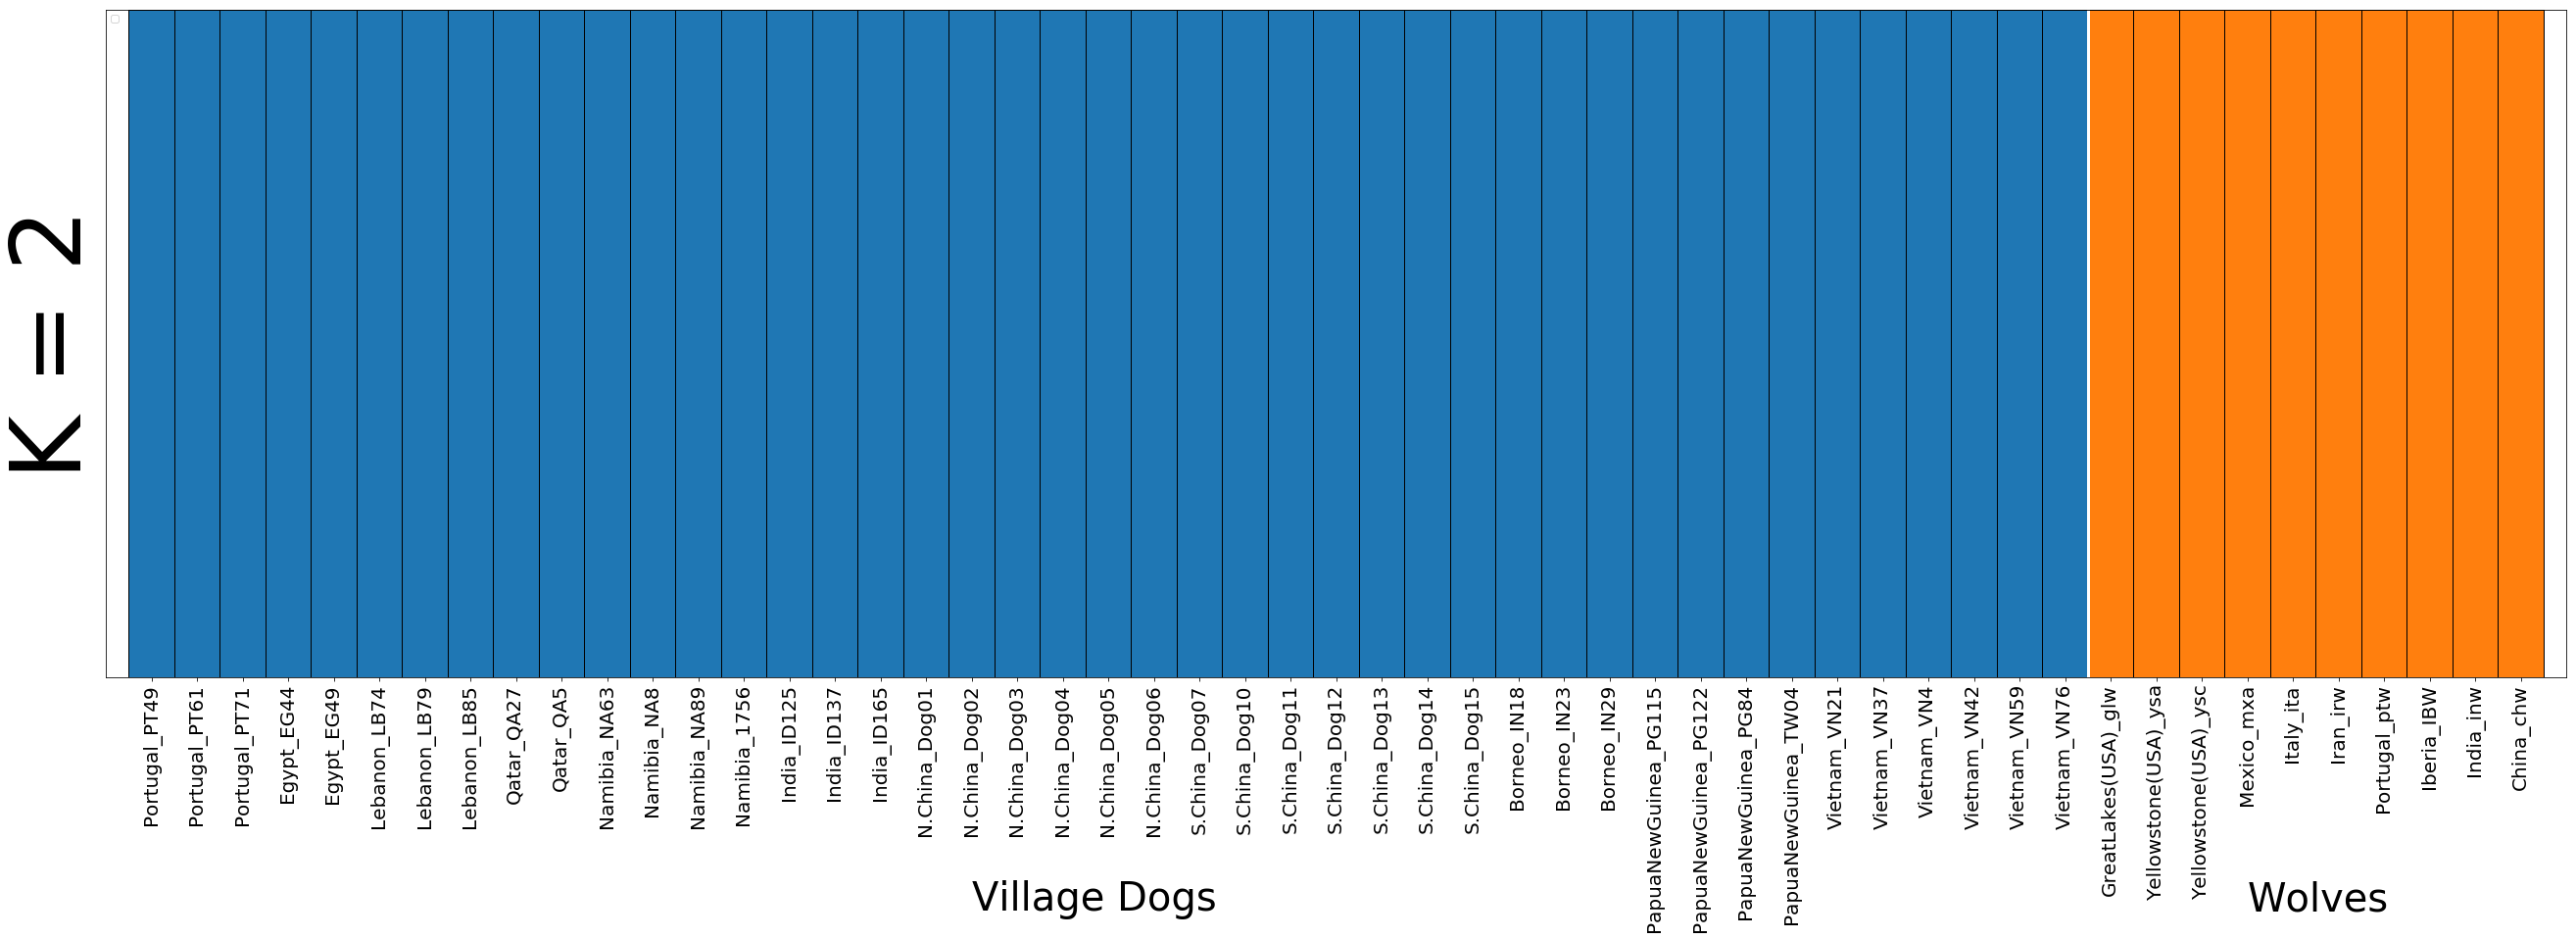

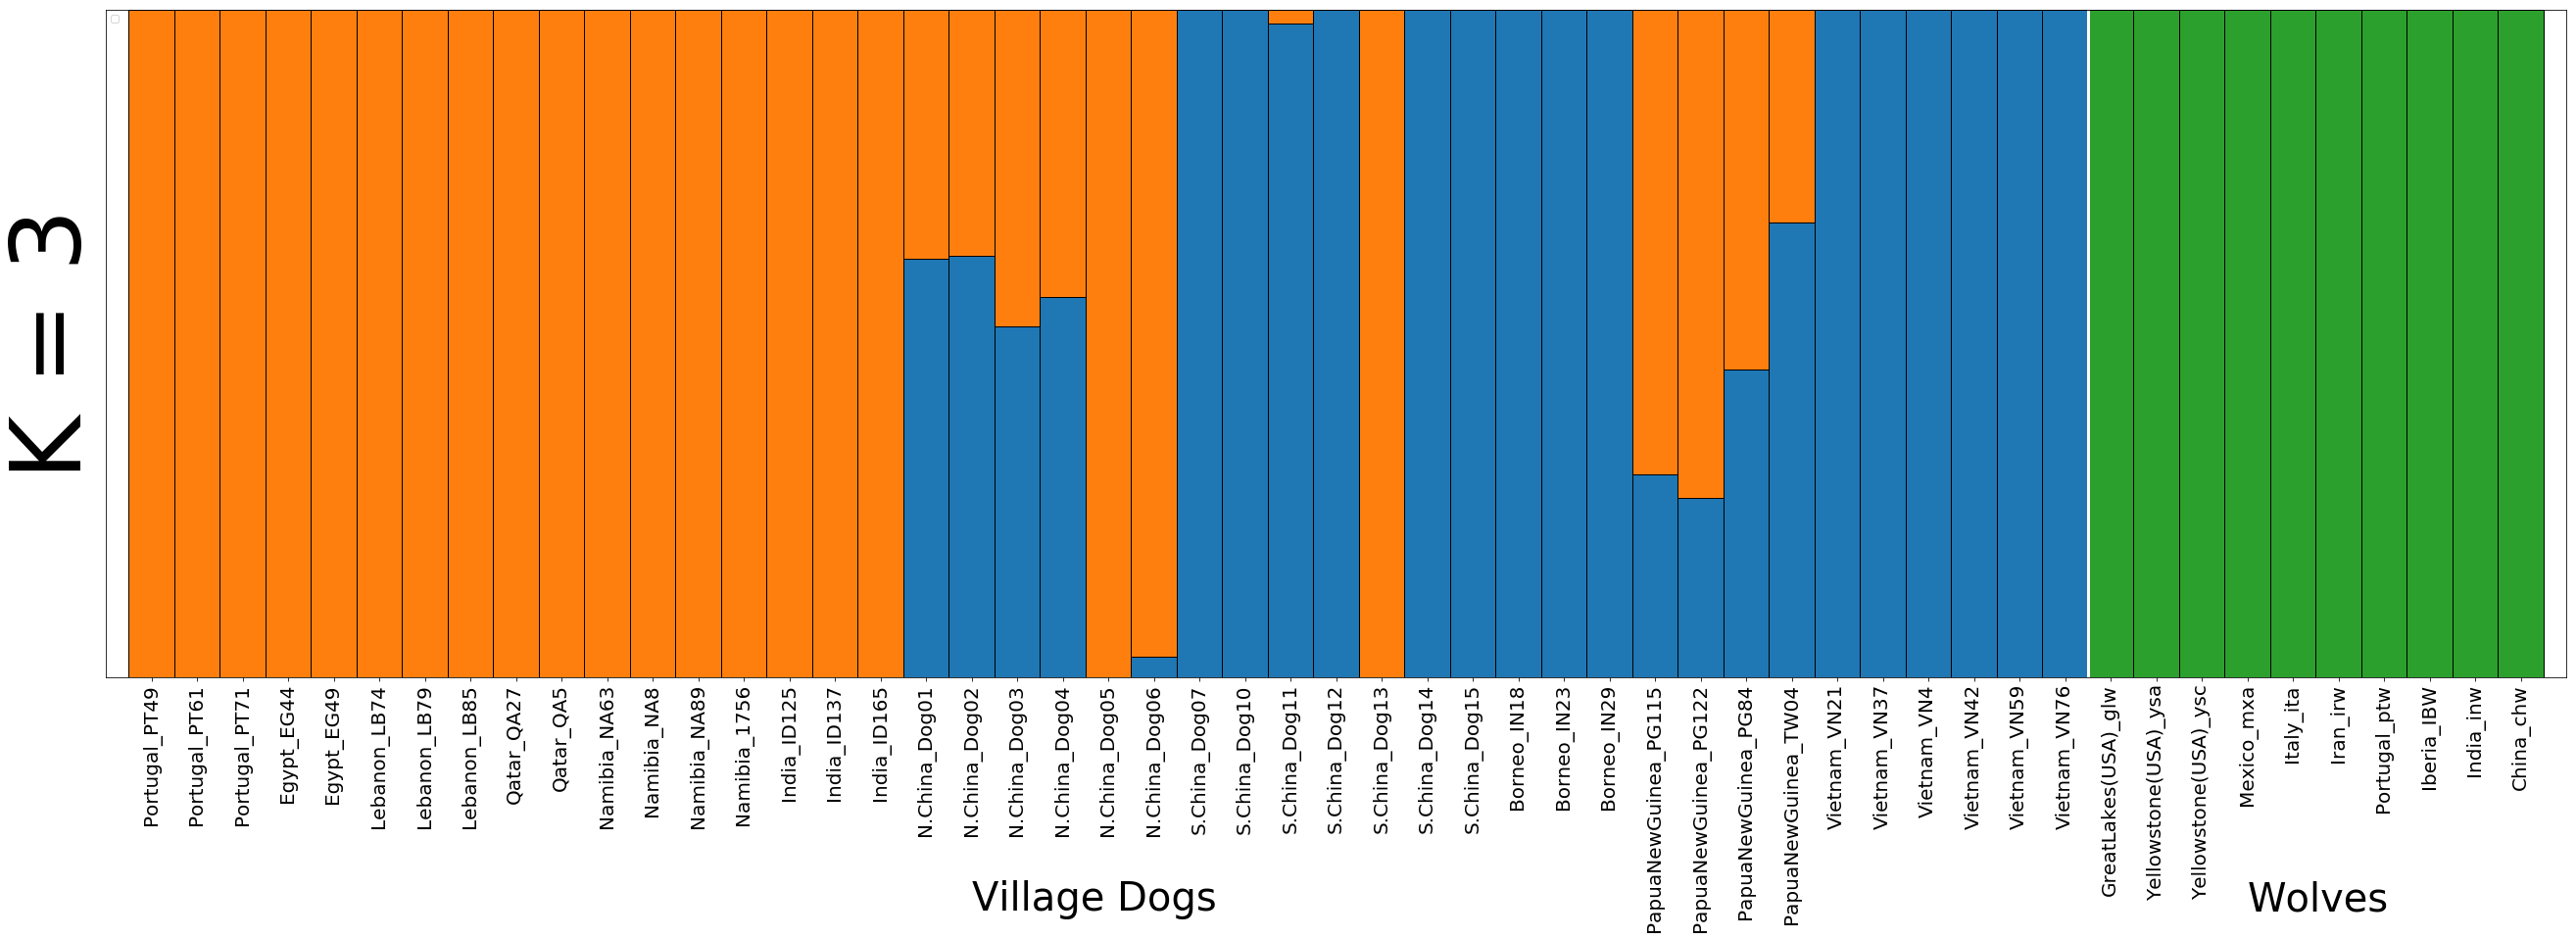

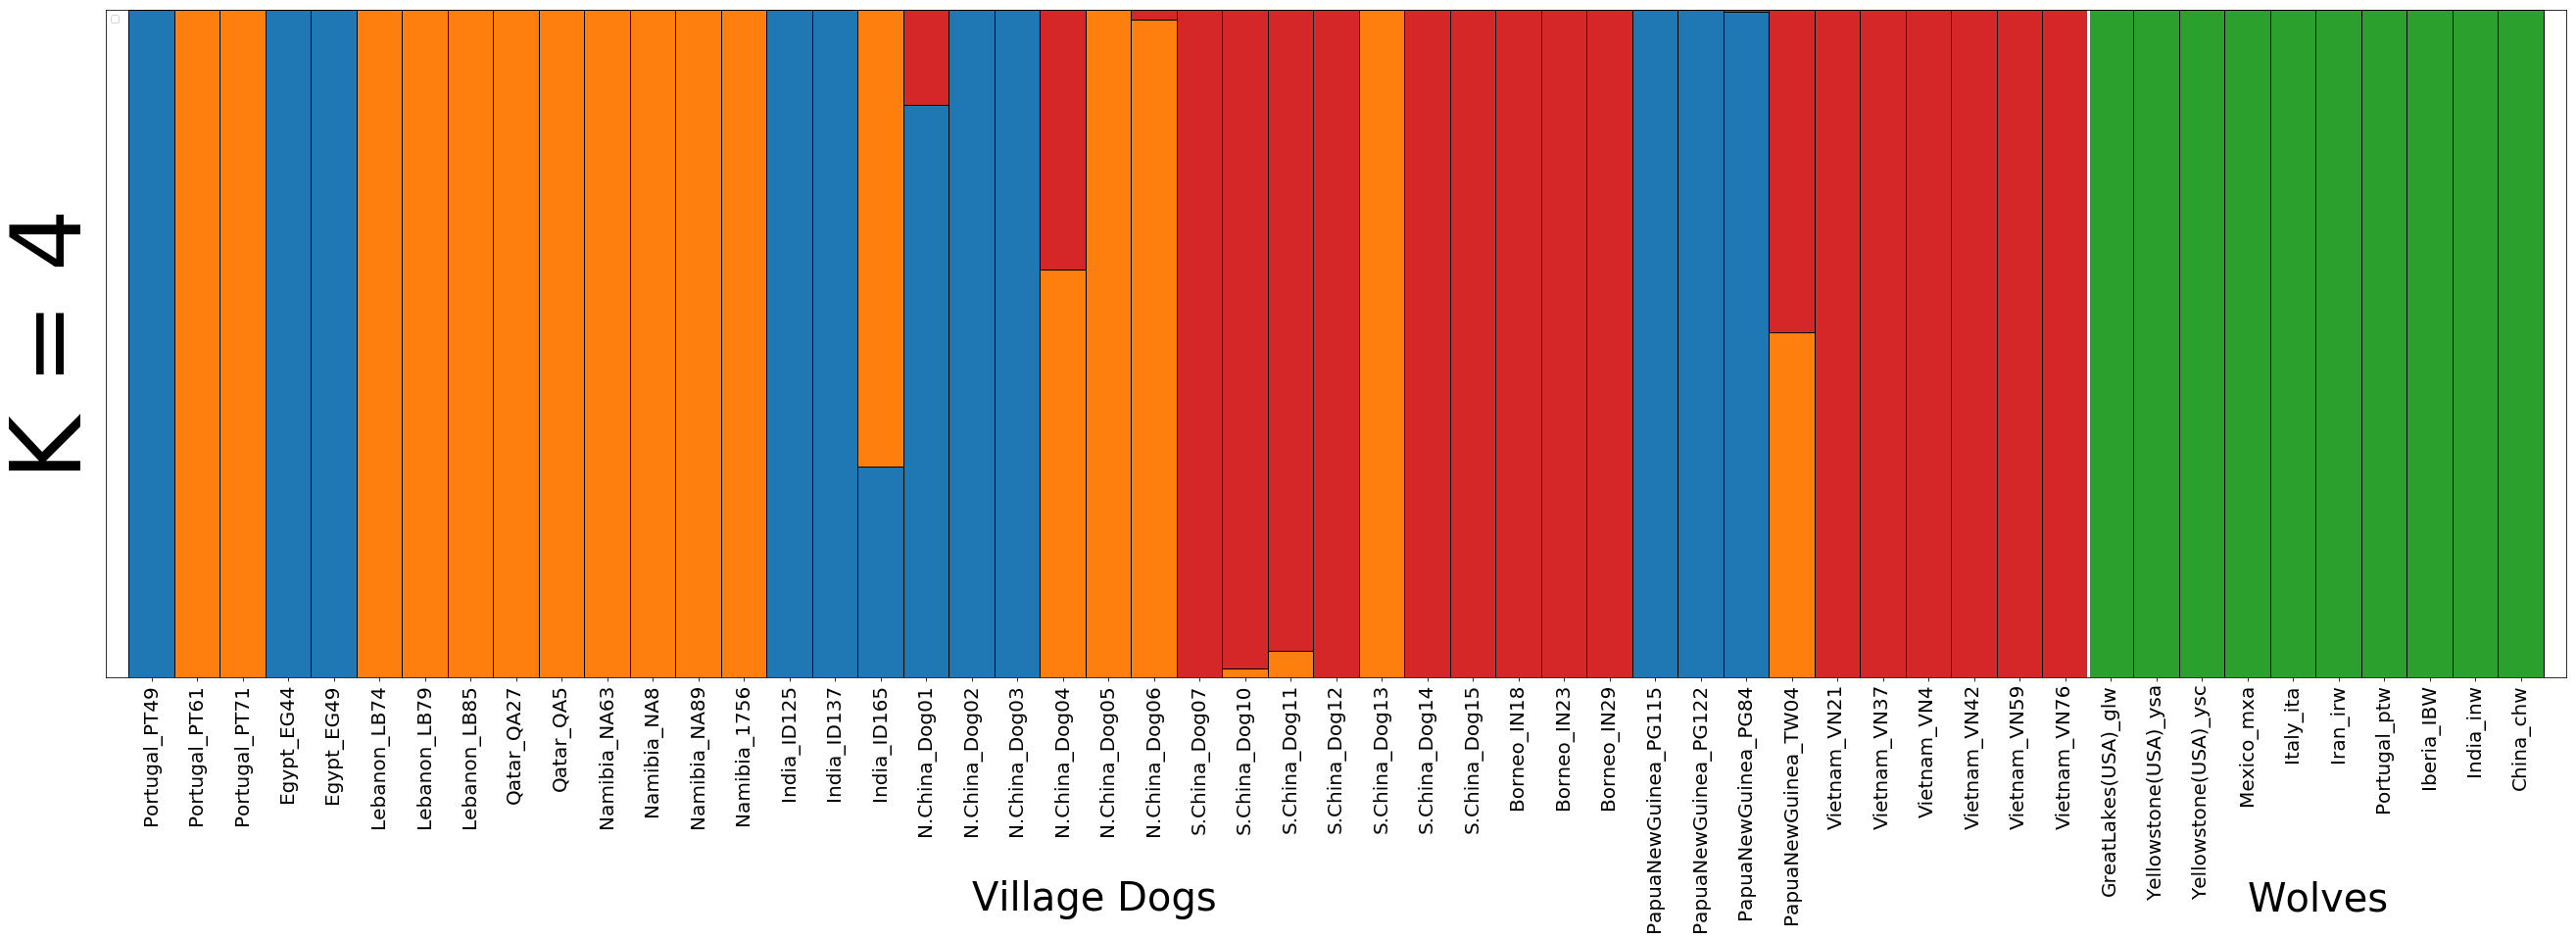

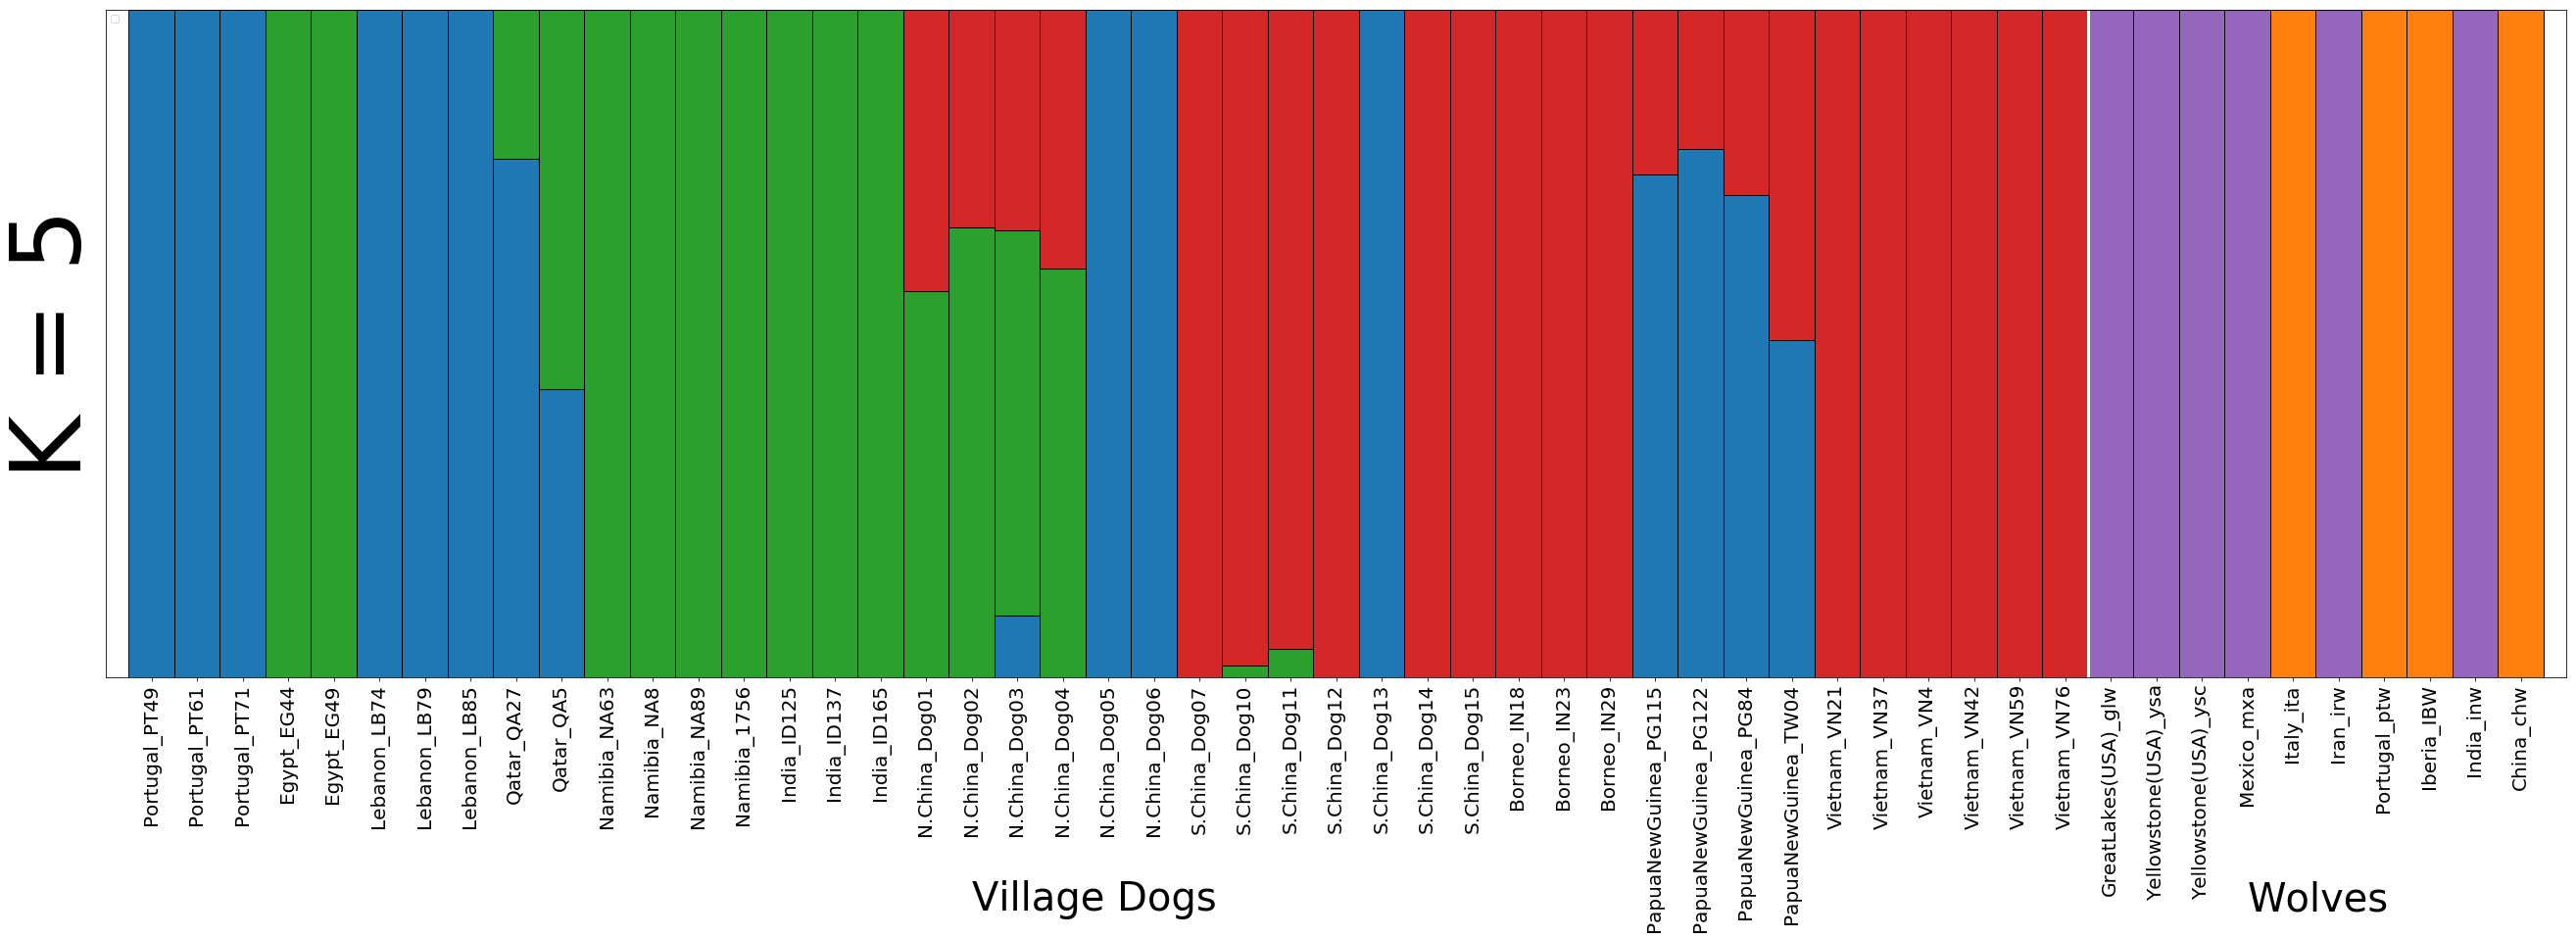

In [30]:
#For testing = starting with the thinned, no outgroup ADMIXTURE results
resultsDir = inDir + 'results/'
cvDict = {}

for runNum in range(1,6):
    runDir = resultsDir + 'Run' + str(runNum) + '/'
    #Keeping track of the CV errors
    cvDict[runNum] = ['','','','',''] #five empty slots
    #Get the admixture data
    for k in range (1,6):
        ADdata = get_AD_data(dogData,k)
        #Now parsing the k's
        CV = get_cross_validation_errors(runNum,k)
        cvDict[runNum][k-1] = CV
        #Draw ADMIXTURE plot
        plotFile = resultsDir + 'plots/' + 'Run%i_AdmixturePlot_K%i.pdf' % (runNum,int(k))
        draw_plot(plotFile,plotOrder,k,ADdata)
        
    #break

## Plot the CV errors per run/k 

Text(0.5,1,'CV Errors Across Five Admixture Runs')

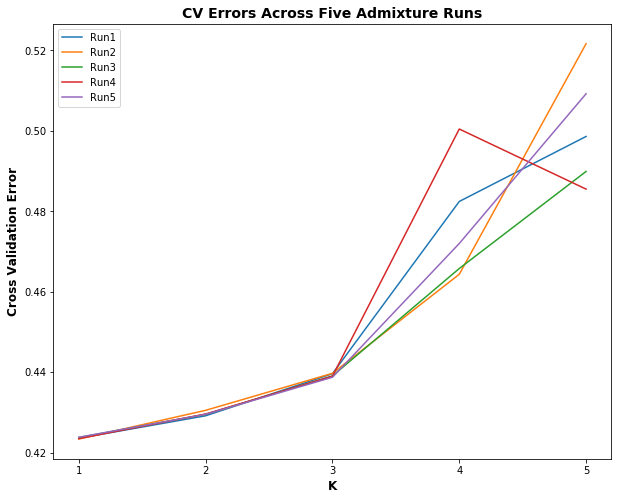

In [31]:
plt.figure(figsize=(10,8))

for i in range(0,len(cvDict)):
    runNum = i + 1
    x = [1,2,3,4,5]
    y = cvDict[runNum]
    plt.plot(x,y, label='Run'+str(runNum))
_ = plt.xticks([1,2,3,4,5])
_ = plt.xlabel('K', fontsize=12,fontweight='bold')
_ = plt.ylabel('Cross Validation Error', fontsize=12, fontweight='bold')
plt.legend()
plt.title('CV Errors Across Five Admixture Runs', fontsize = 14, fontweight='bold')